# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import io
import os
from scipy import signal

In [2]:
#load dataset
#3 patients, pre and post stroke

P1_pre_training = io.loadmat('P1_pre_training.mat')
P1_post_training = io.loadmat('P1_post_training.mat')
P1_pre_test = io.loadmat('P1_pre_test.mat')
P1_post_test = io.loadmat('P1_post_test.mat')

P2_pre_training = io.loadmat('P2_pre_training.mat')
P2_post_training = io.loadmat('P2_post_training.mat')
P2_pre_test = io.loadmat('P2_pre_test.mat')
P2_post_test = io.loadmat('P2_post_test.mat')

P3_pre_training = io.loadmat('P3_pre_training.mat')
P3_post_training = io.loadmat('P3_post_training.mat')
P3_pre_test = io.loadmat('P3_pre_test.mat')
P3_post_test = io.loadmat('P3_post_test.mat')

In [14]:
#labels
label_P1_pre_training=P1_pre_training['trig']
label_P1_pre_training

array([[ 0],
       [ 0],
       [ 0],
       ...,
       [-1],
       [-1],
       [-1]], dtype=int16)

In [4]:
(unique, counts) = np.unique(P1_pre_training['trig'], return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[    -1,  79889],
       [     0, 110007],
       [     1,  81920]], dtype=int64)

In [5]:
for m in [P1_pre_training, P1_post_training, P1_pre_test, P1_post_test, 
          P2_pre_training, P2_post_training, P2_pre_test, P2_post_test, 
          P3_pre_training, P3_post_training, P3_pre_test, P3_post_test]:
    print(np.shape(m['y']))                                                  #16 channels

(271816, 16)
(197343, 16)
(204560, 16)
(194088, 16)
(223112, 16)
(216720, 16)
(199552, 16)
(233576, 16)
(205536, 16)
(206504, 16)
(248488, 16)
(218432, 16)


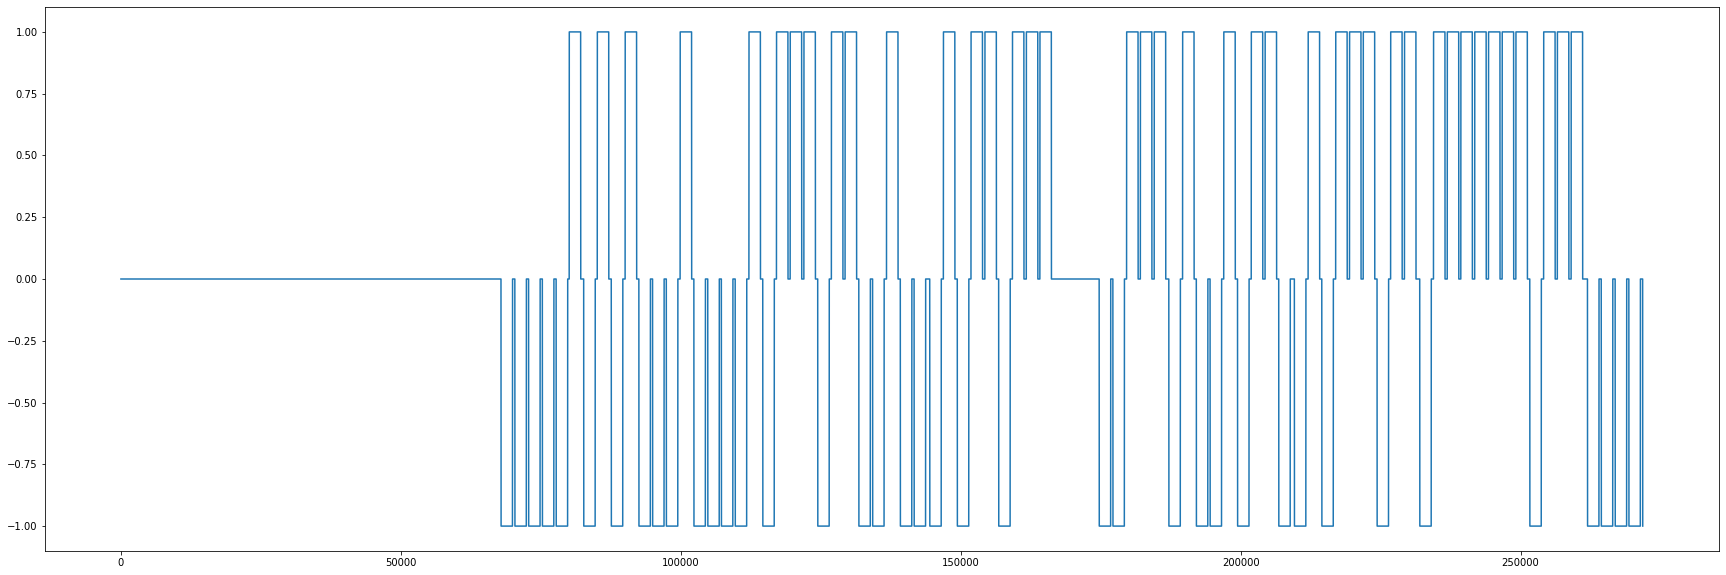

In [19]:
#P1_pre_training

t = range(271816)        

plt.figure(figsize=(30,10))
plt.plot(t,label_P1_pre_training[:,0])
plt.show()

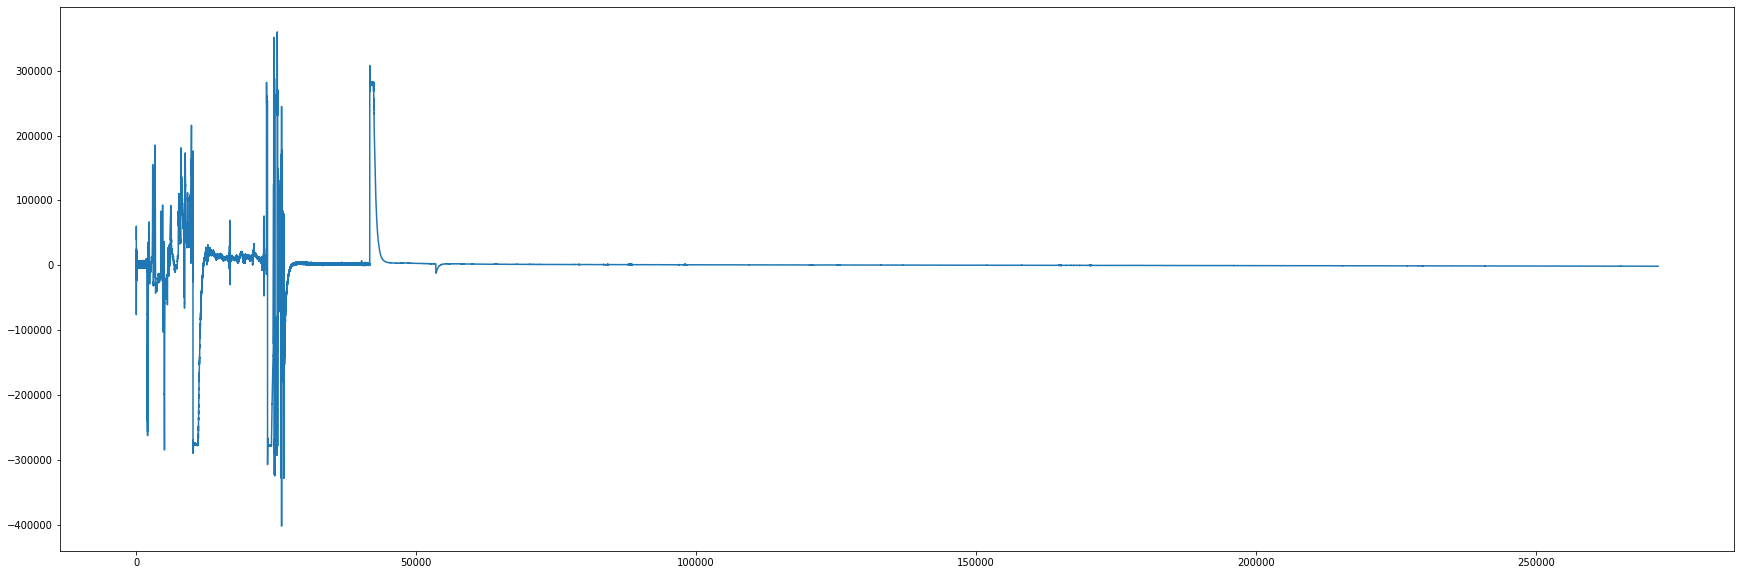

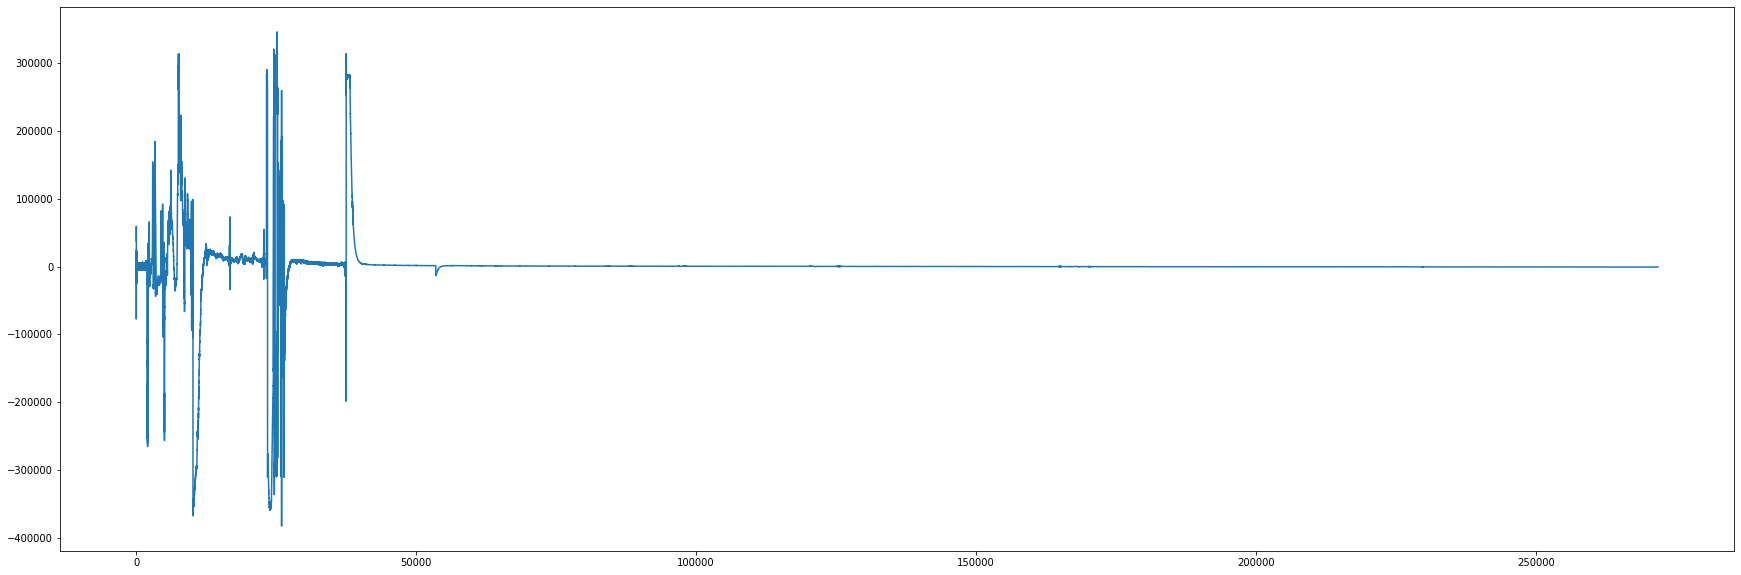

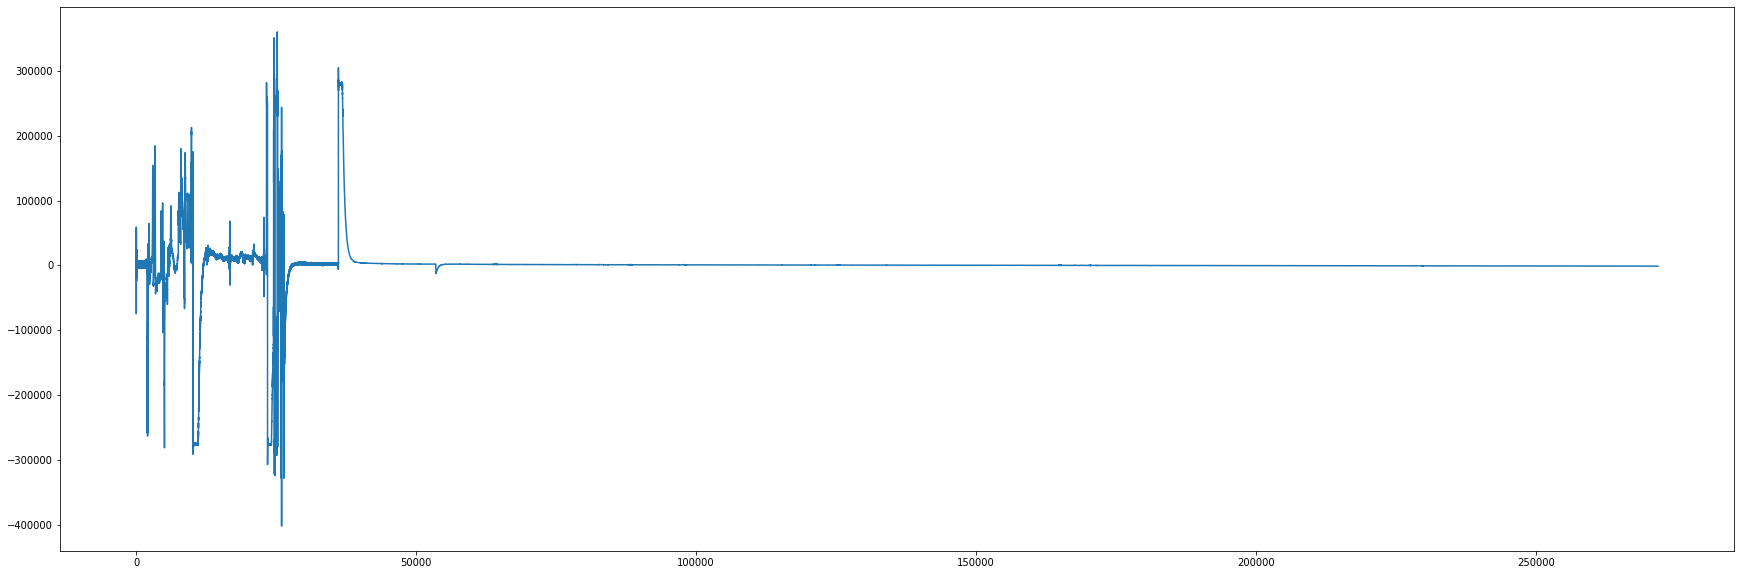

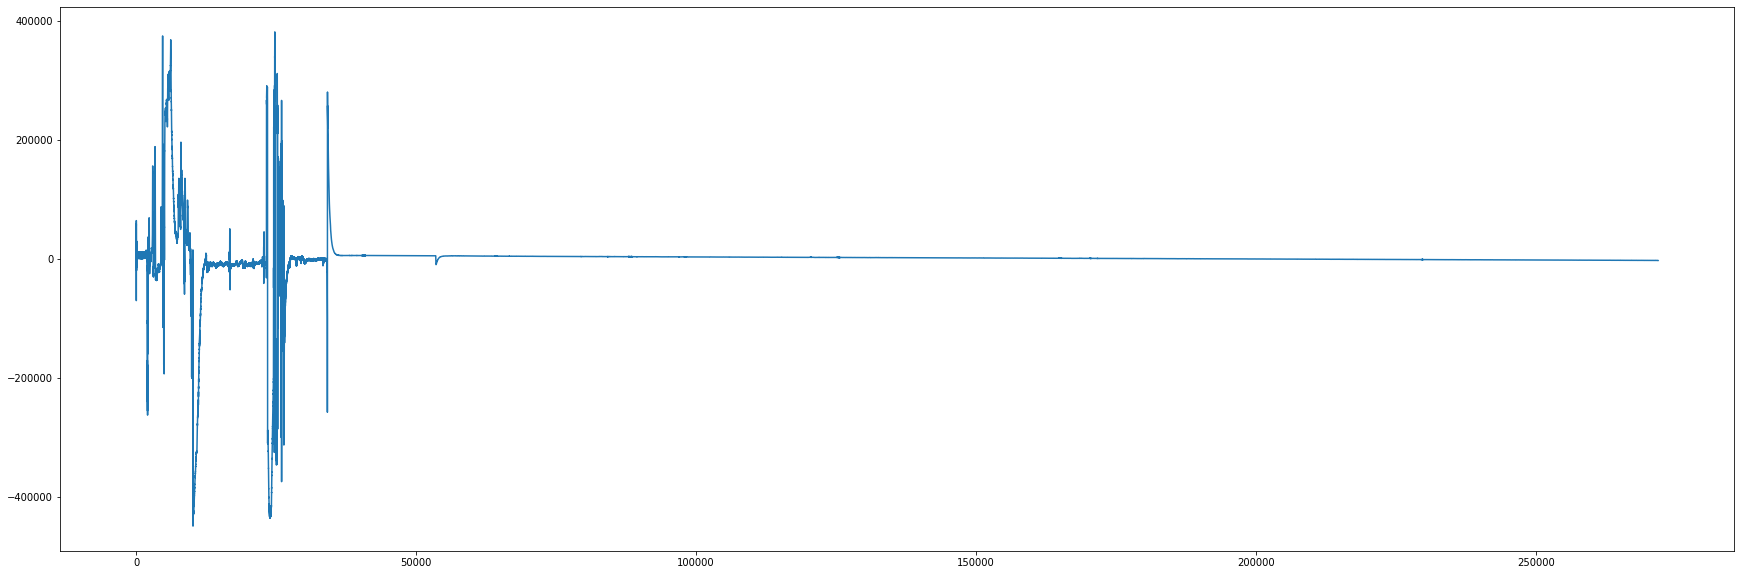

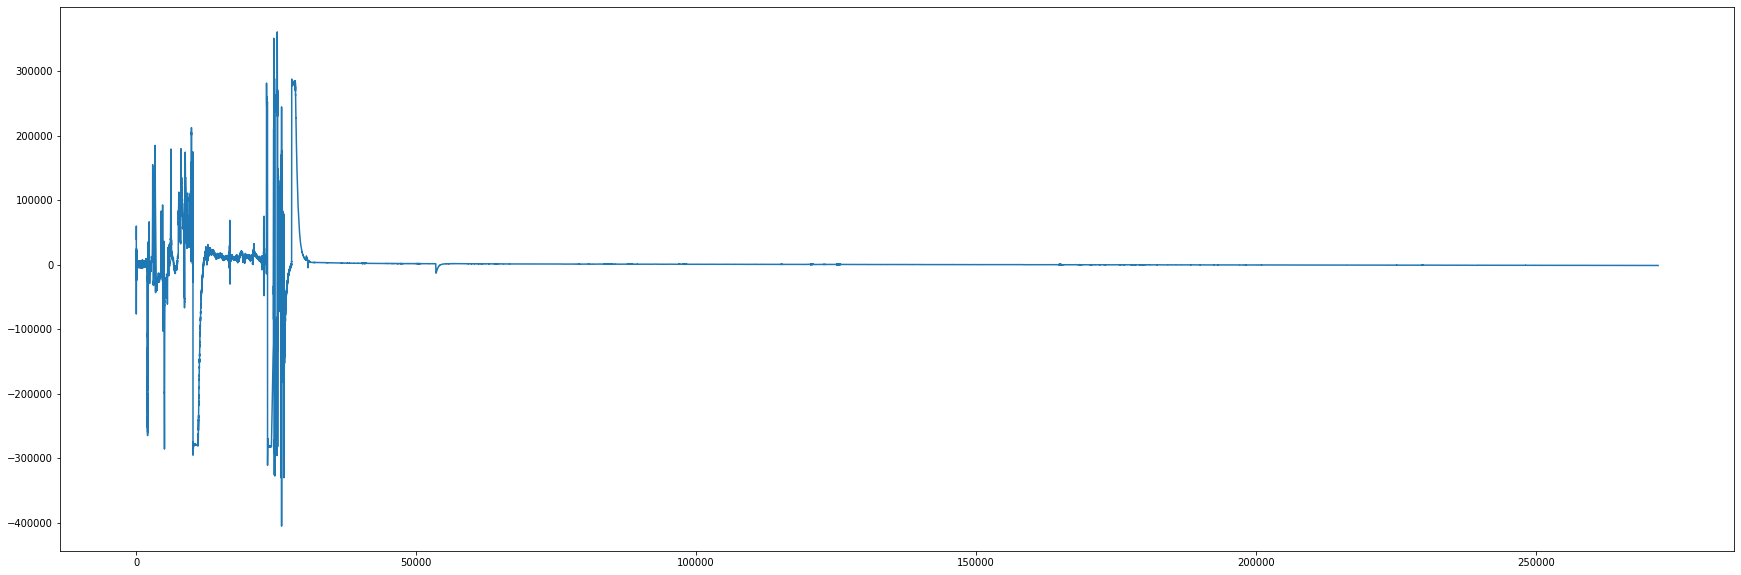

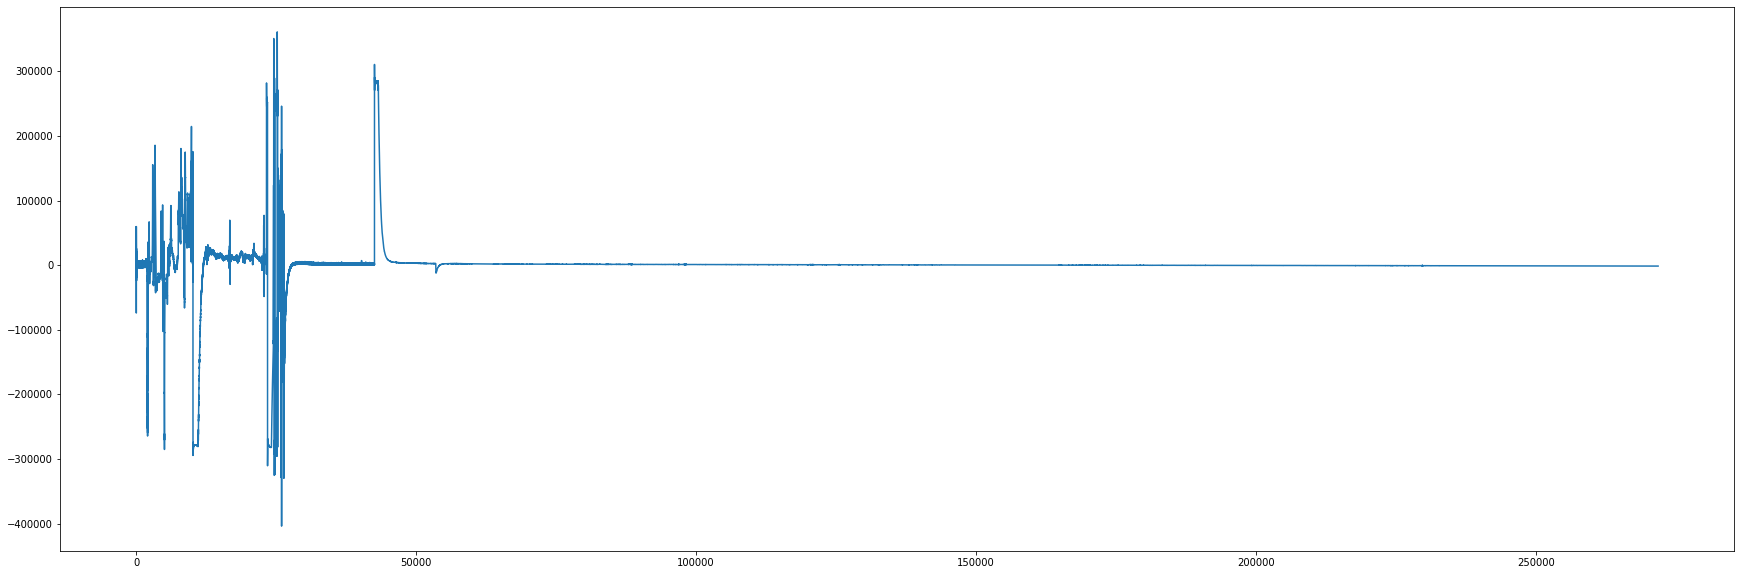

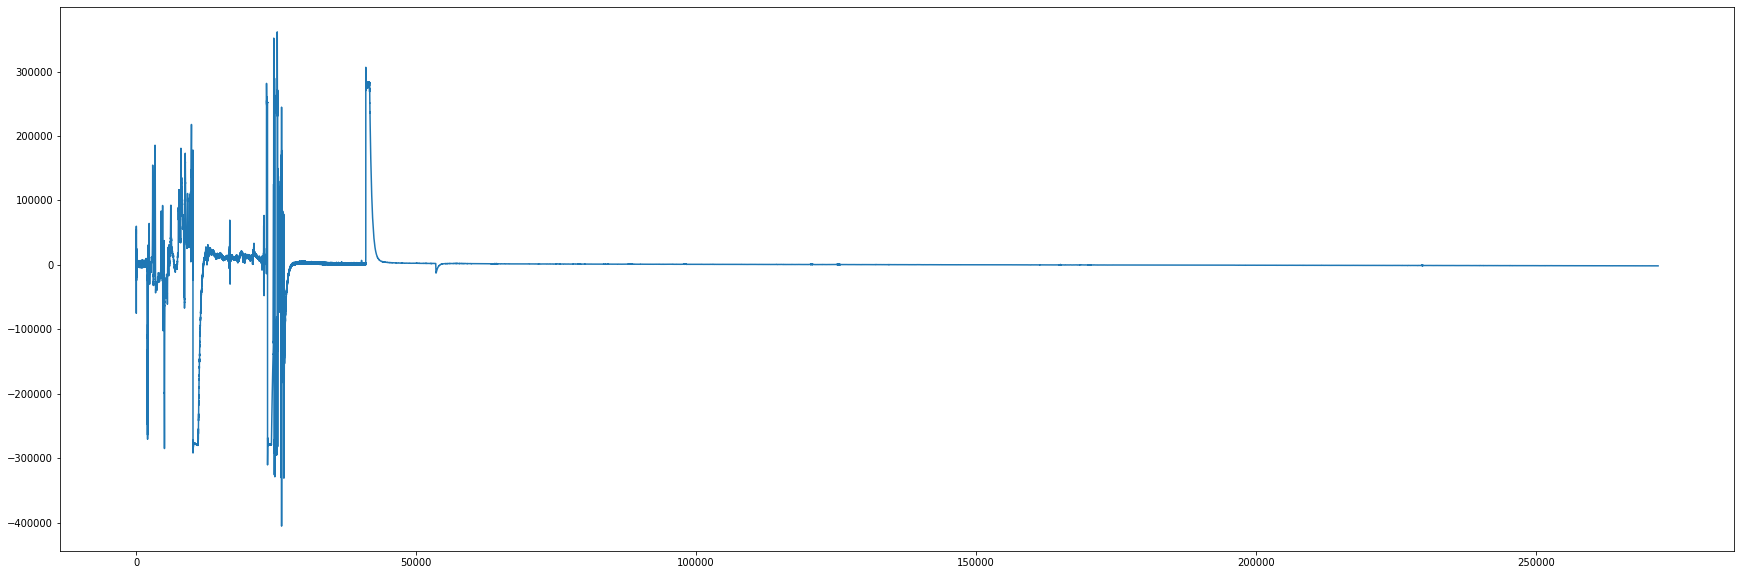

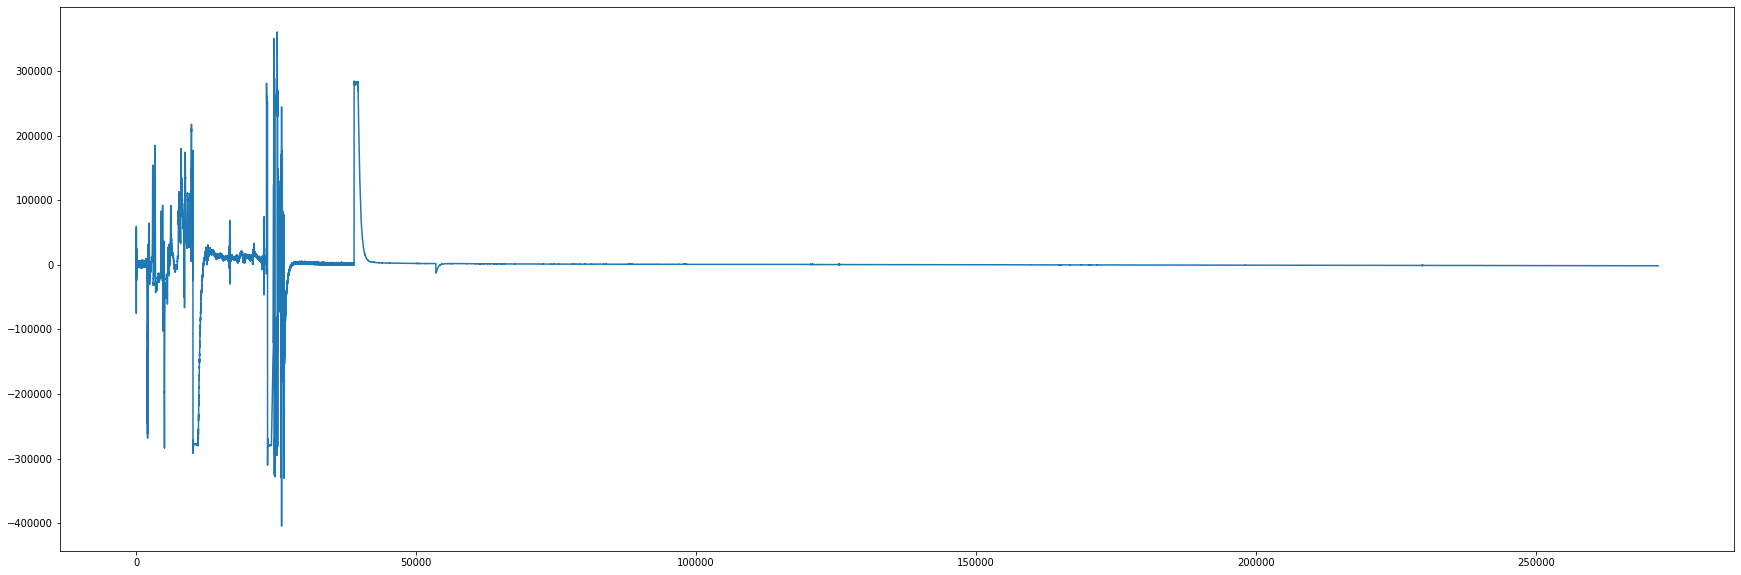

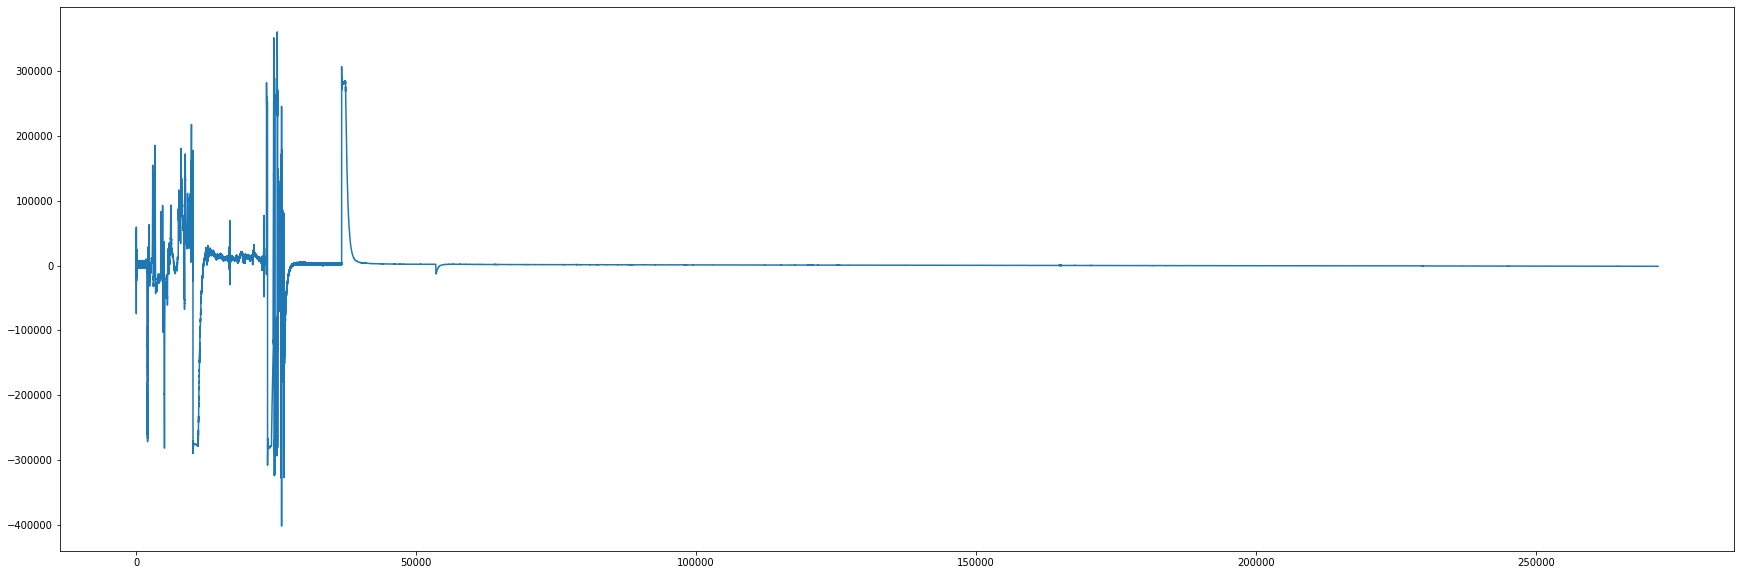

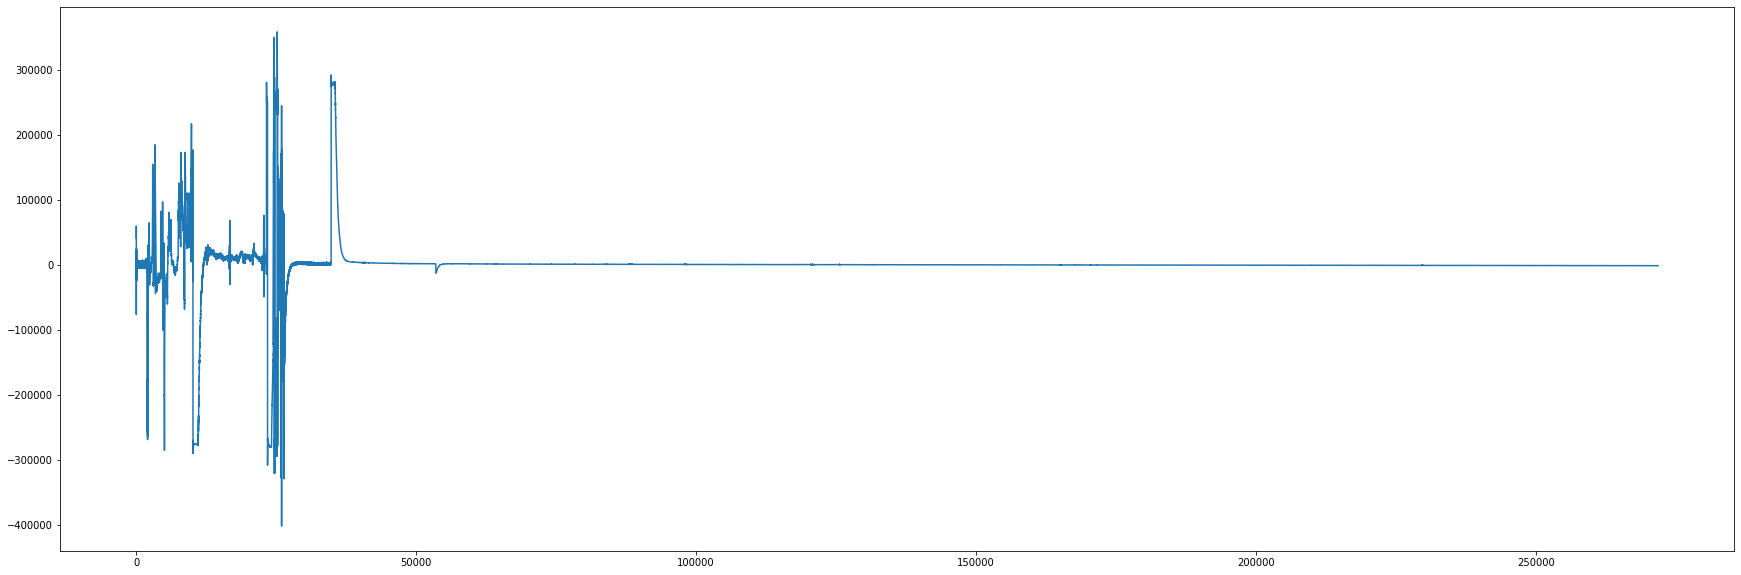

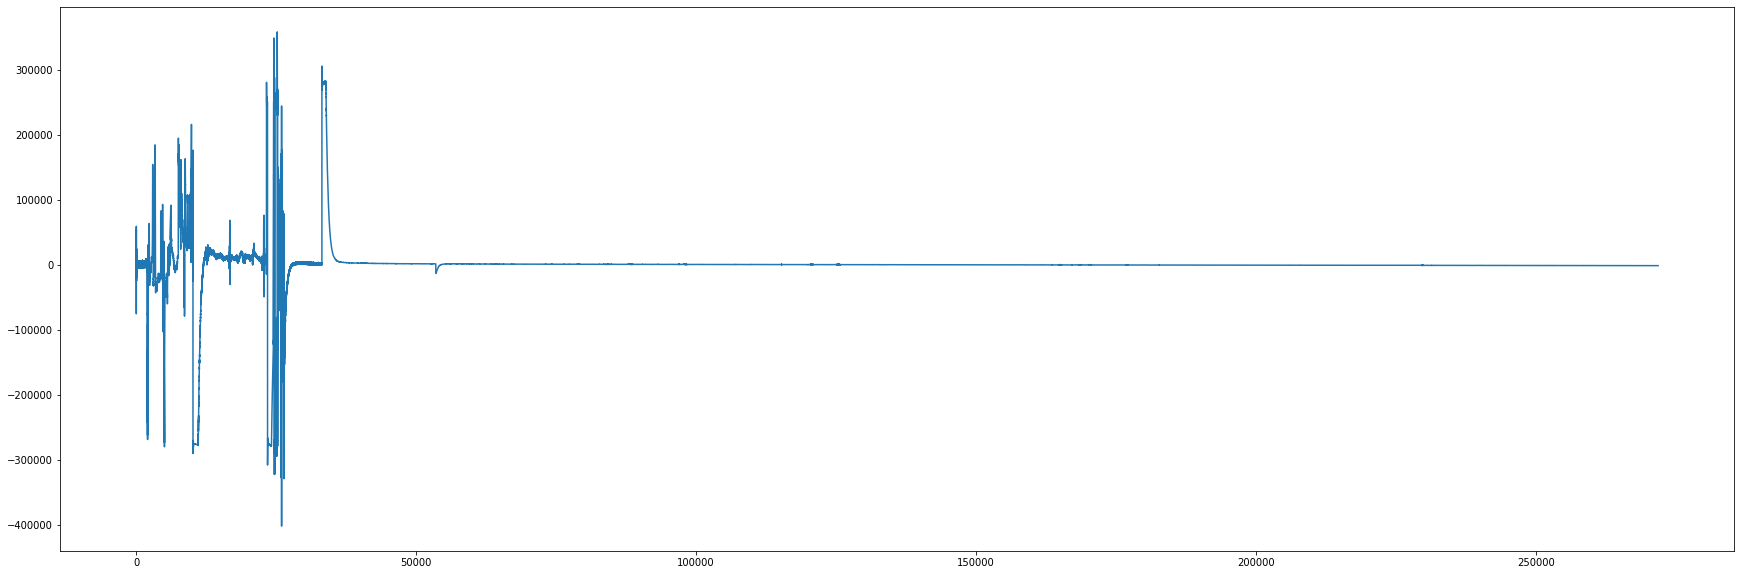

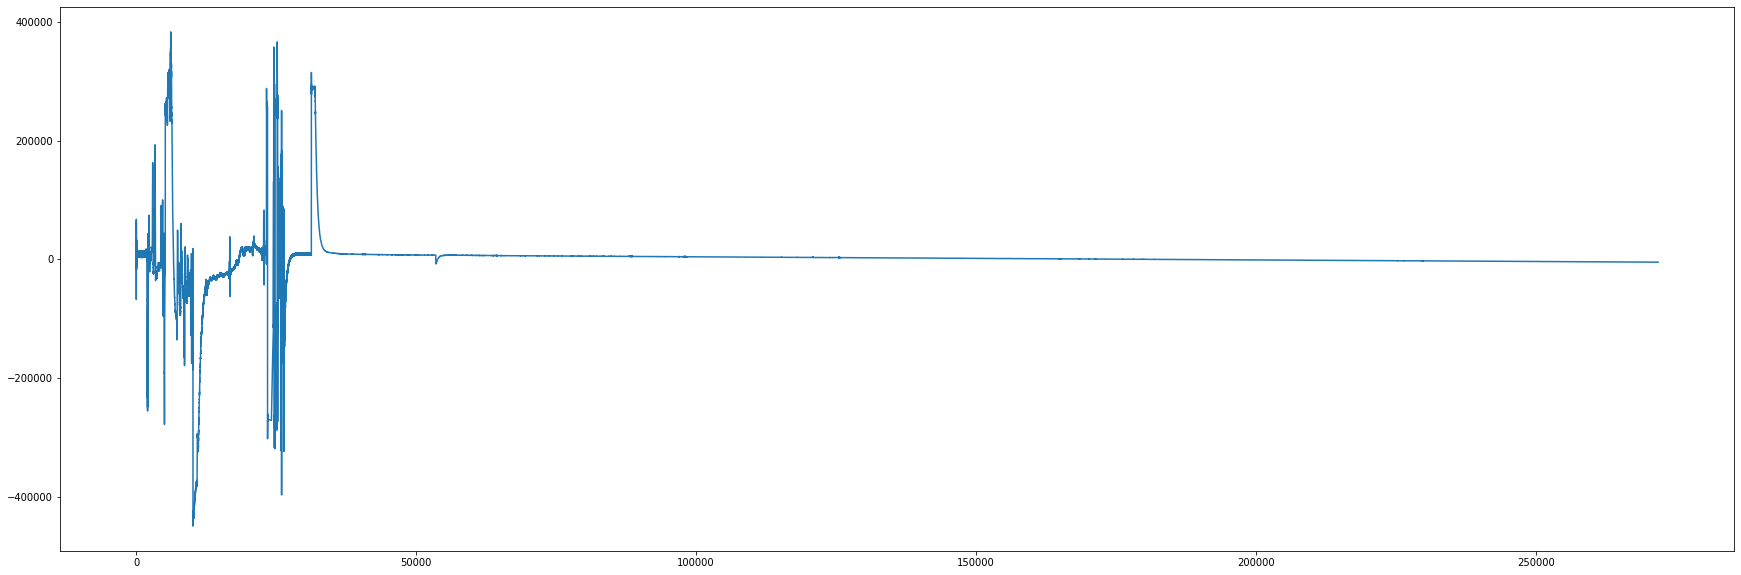

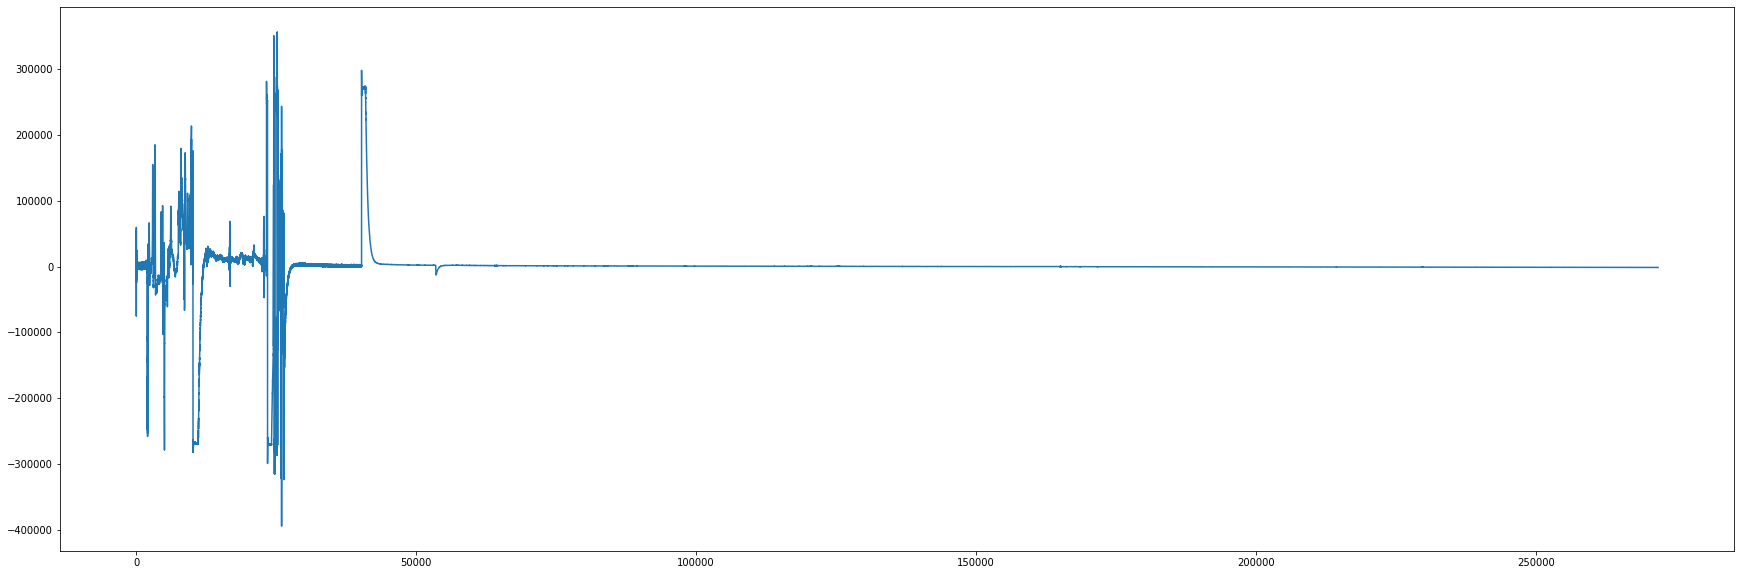

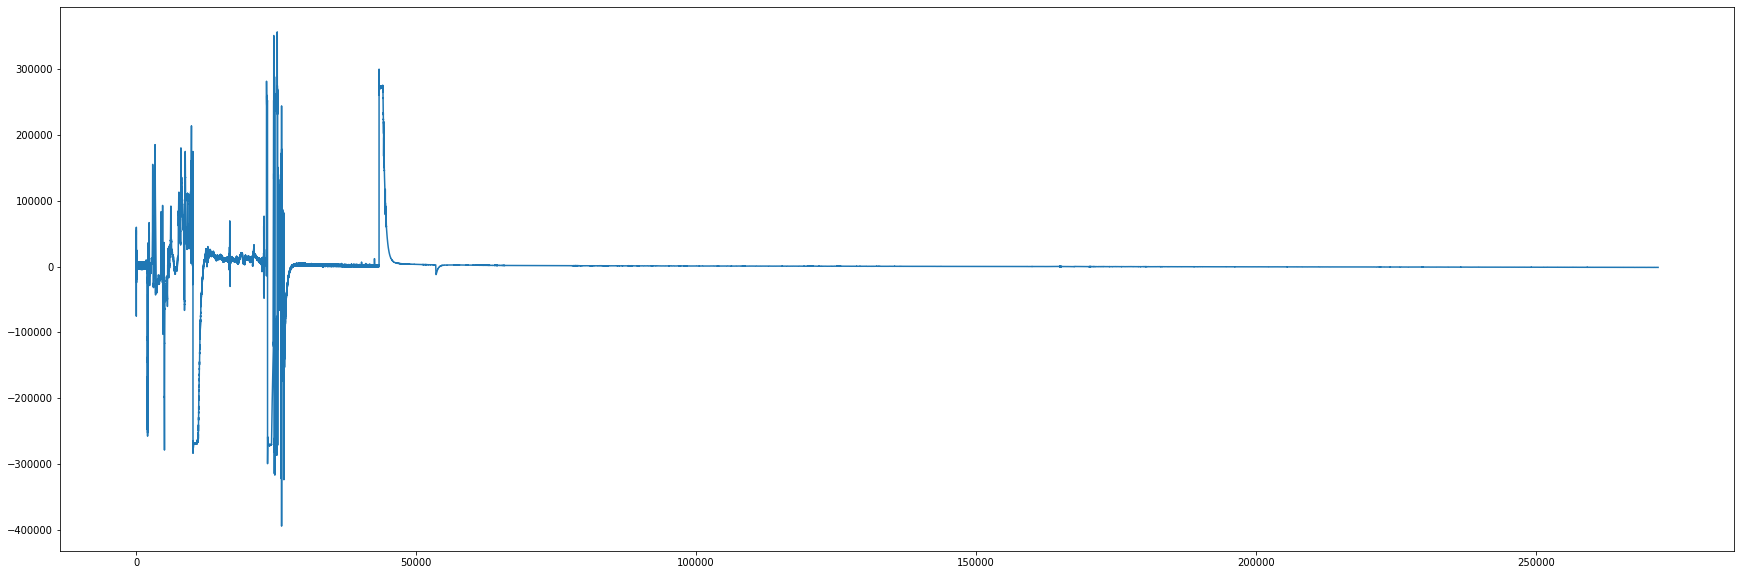

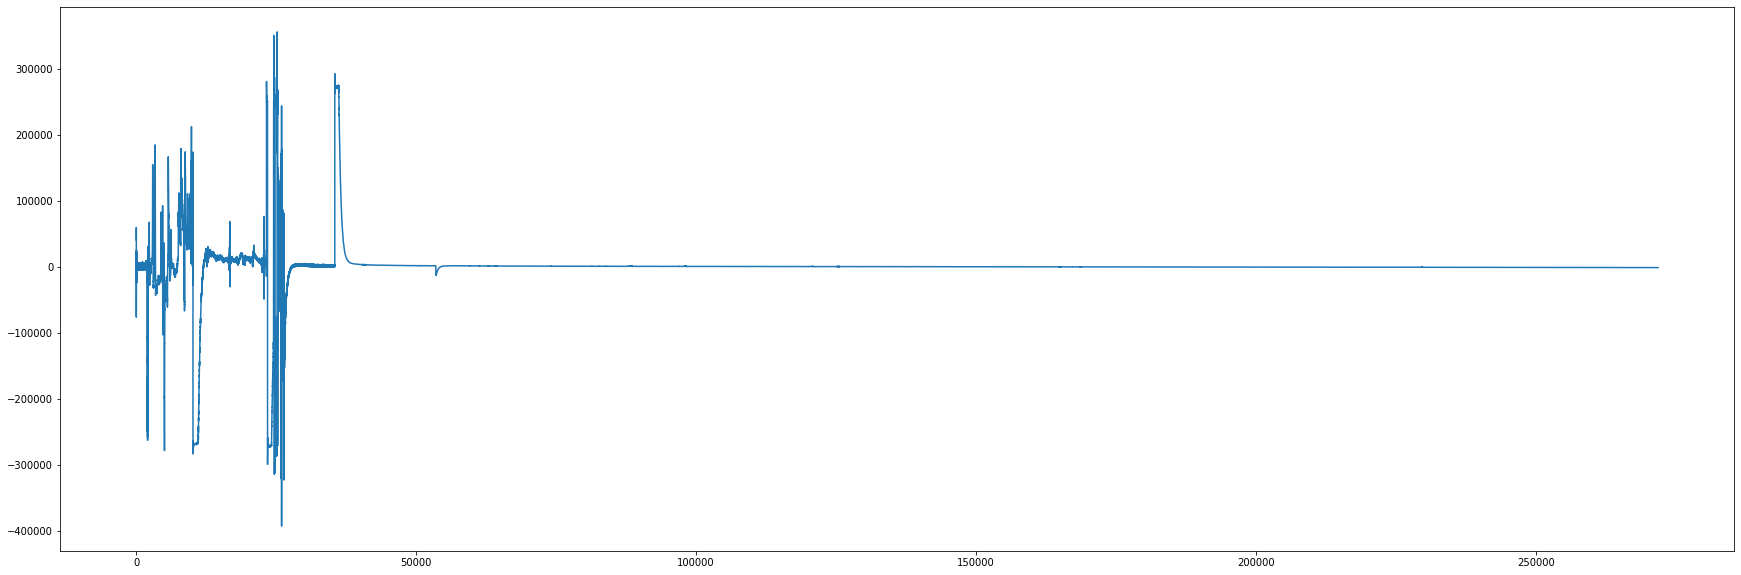

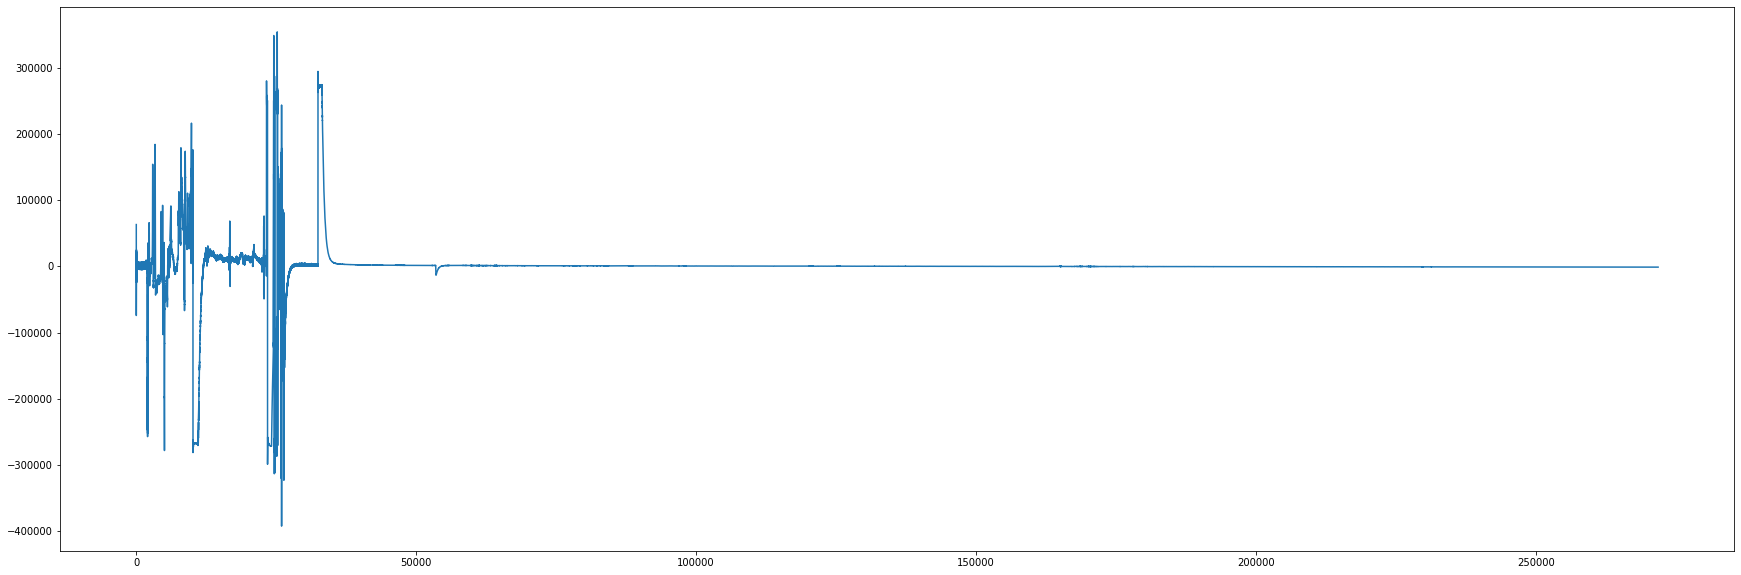

In [25]:
#P1_pre_training

t = range(271816)        
for i in range(16):
    
    x=P1_pre_training['y'][:,i]
    x=signal.detrend(x)
    
    plt.figure(figsize=(30,10))
    plt.plot(t,x)
    plt.show()

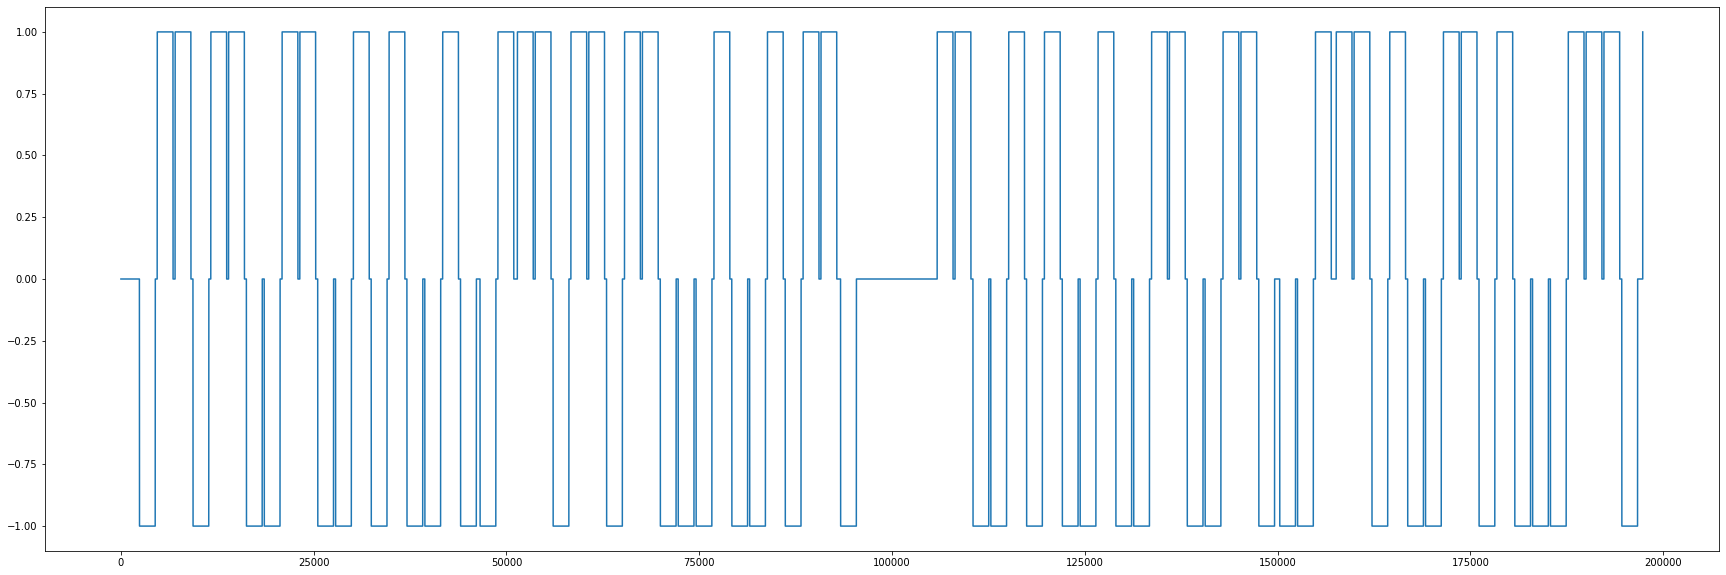

In [23]:
#labels
label_P1_post_training=P1_post_training['trig']
label_P1_post_training

#P1_pre_training

t = range(197343)        

plt.figure(figsize=(30,10))
plt.plot(t,label_P1_post_training[:,0])
plt.show()

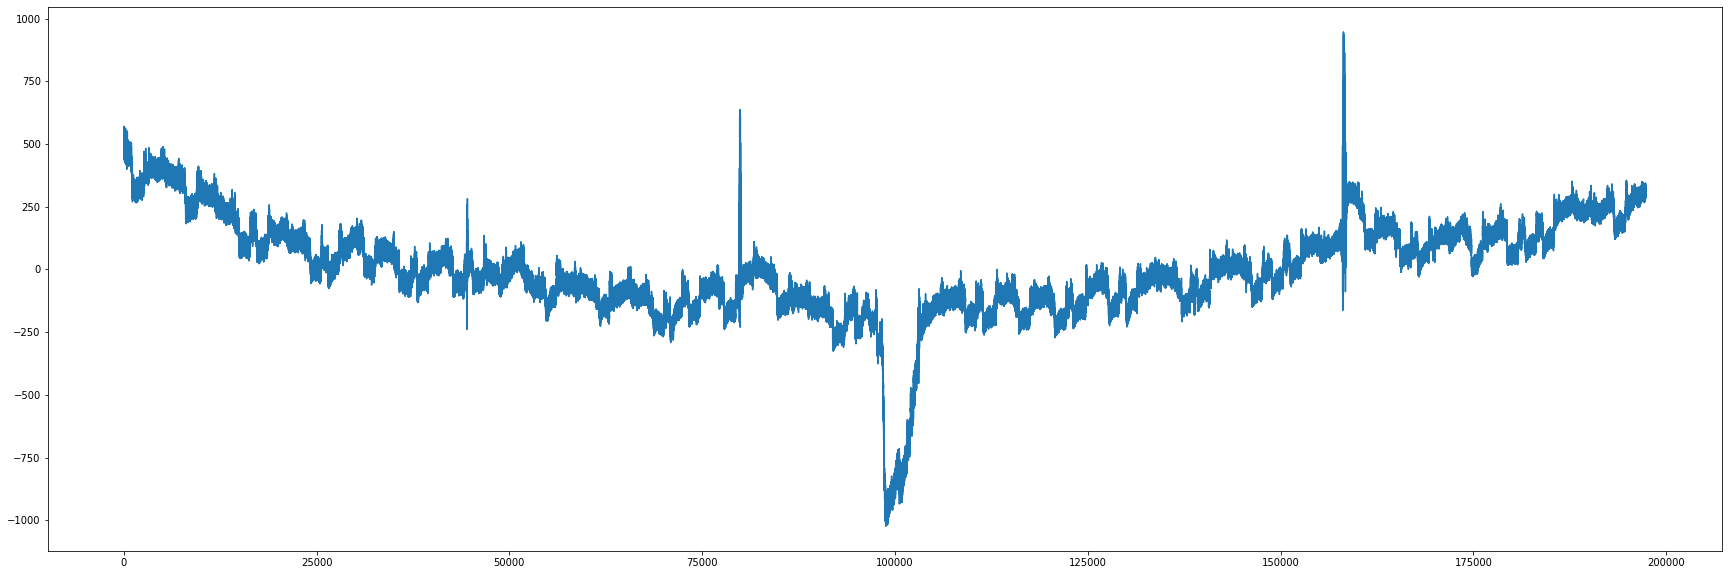

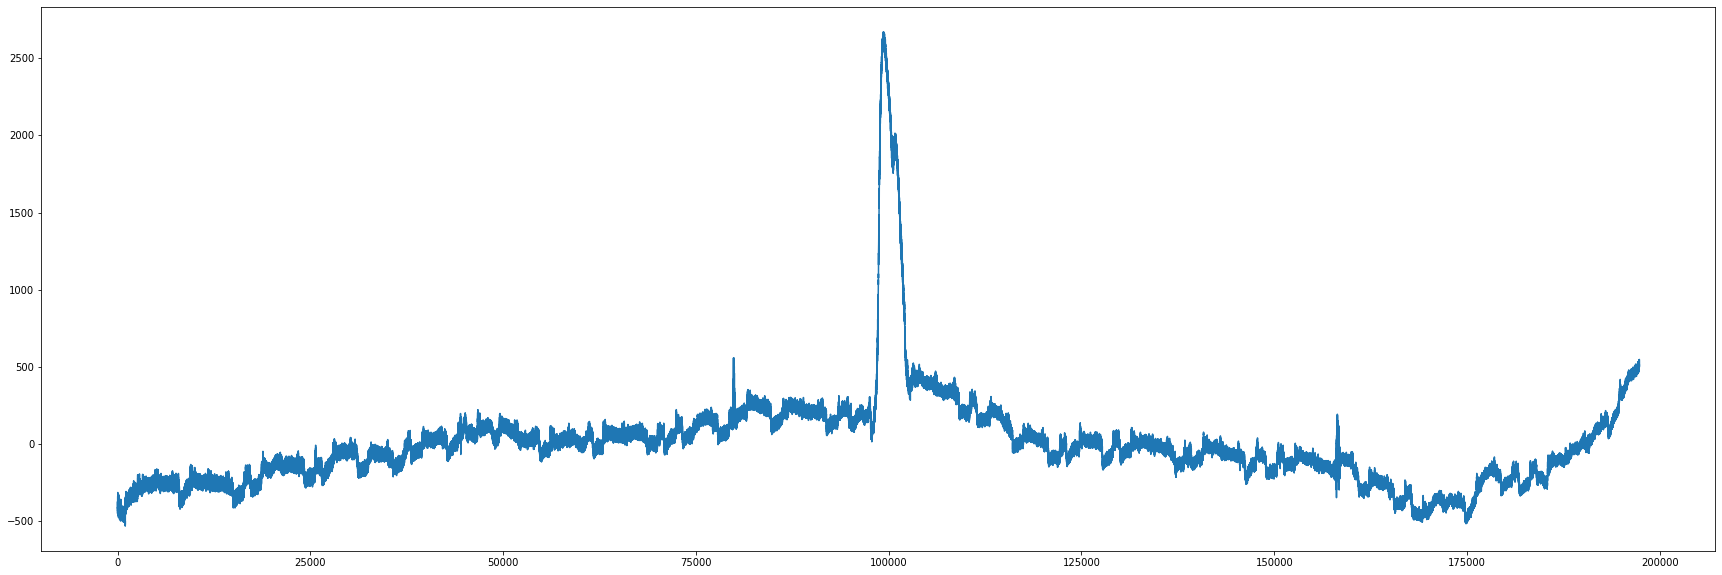

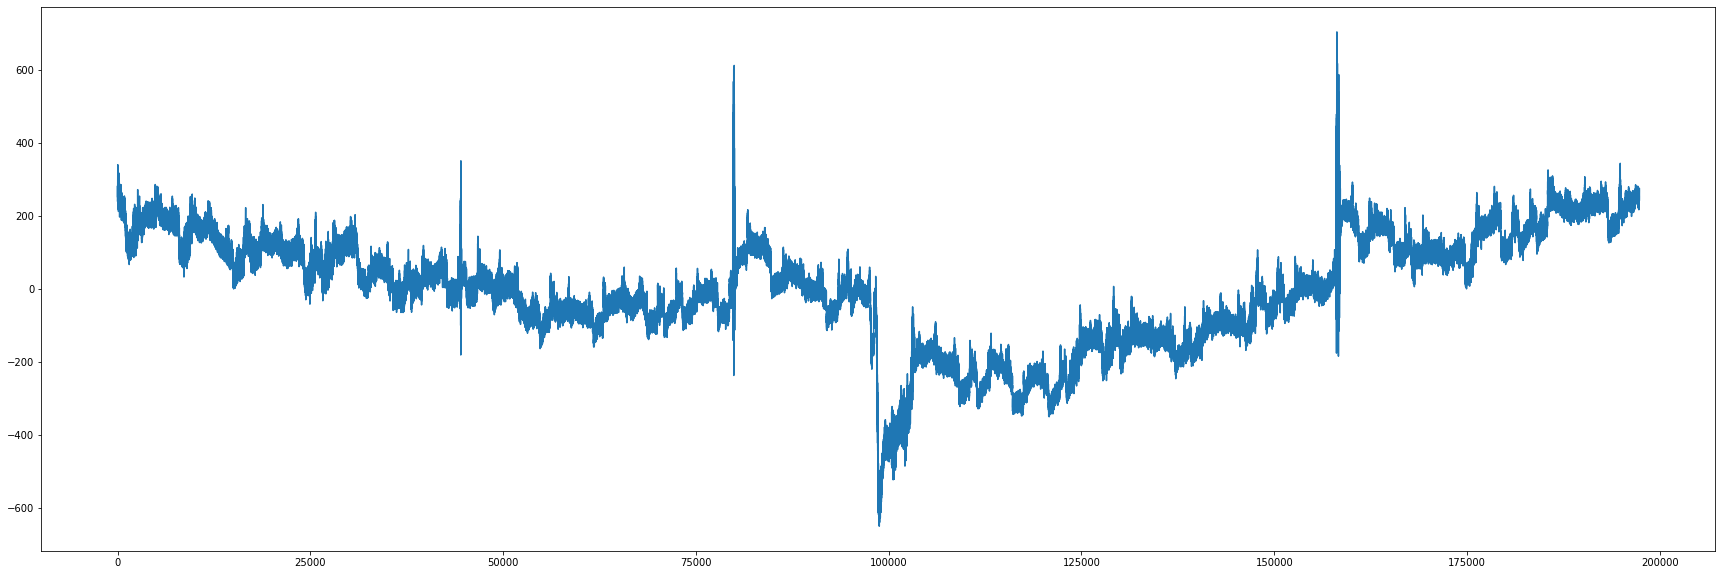

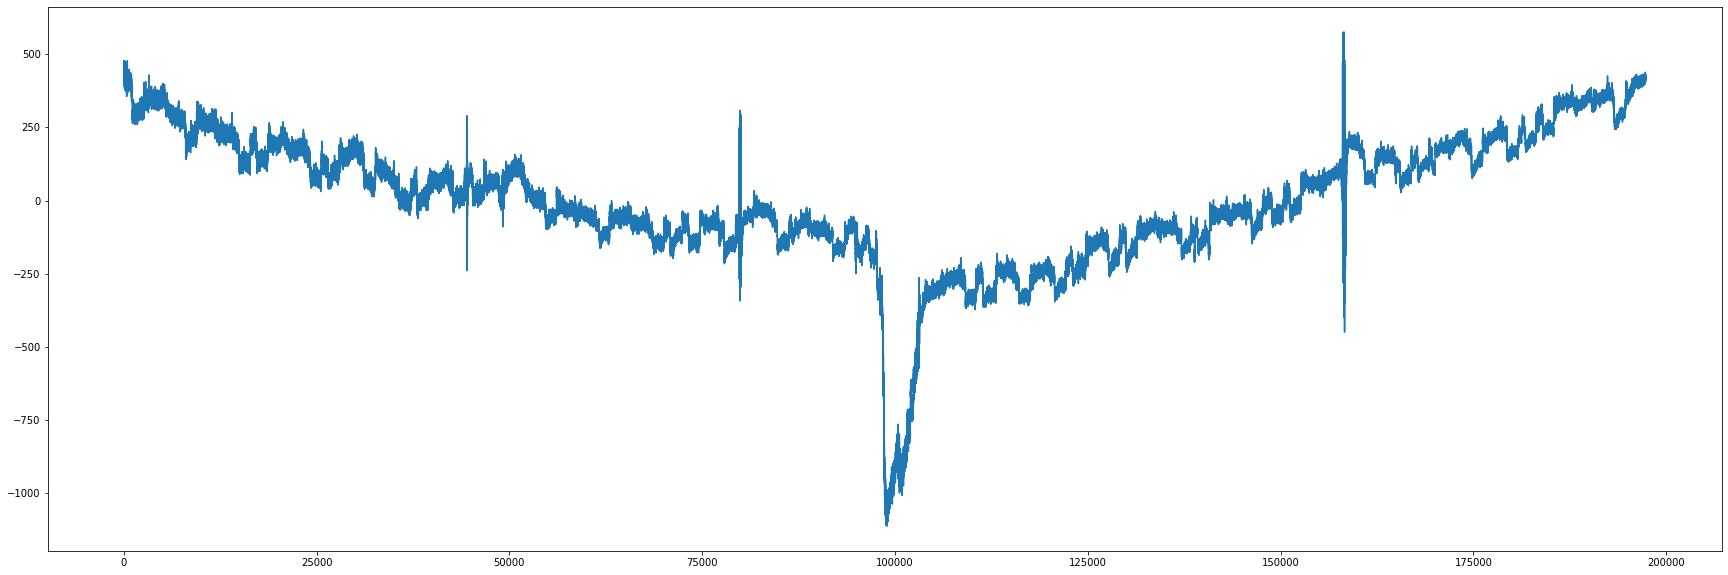

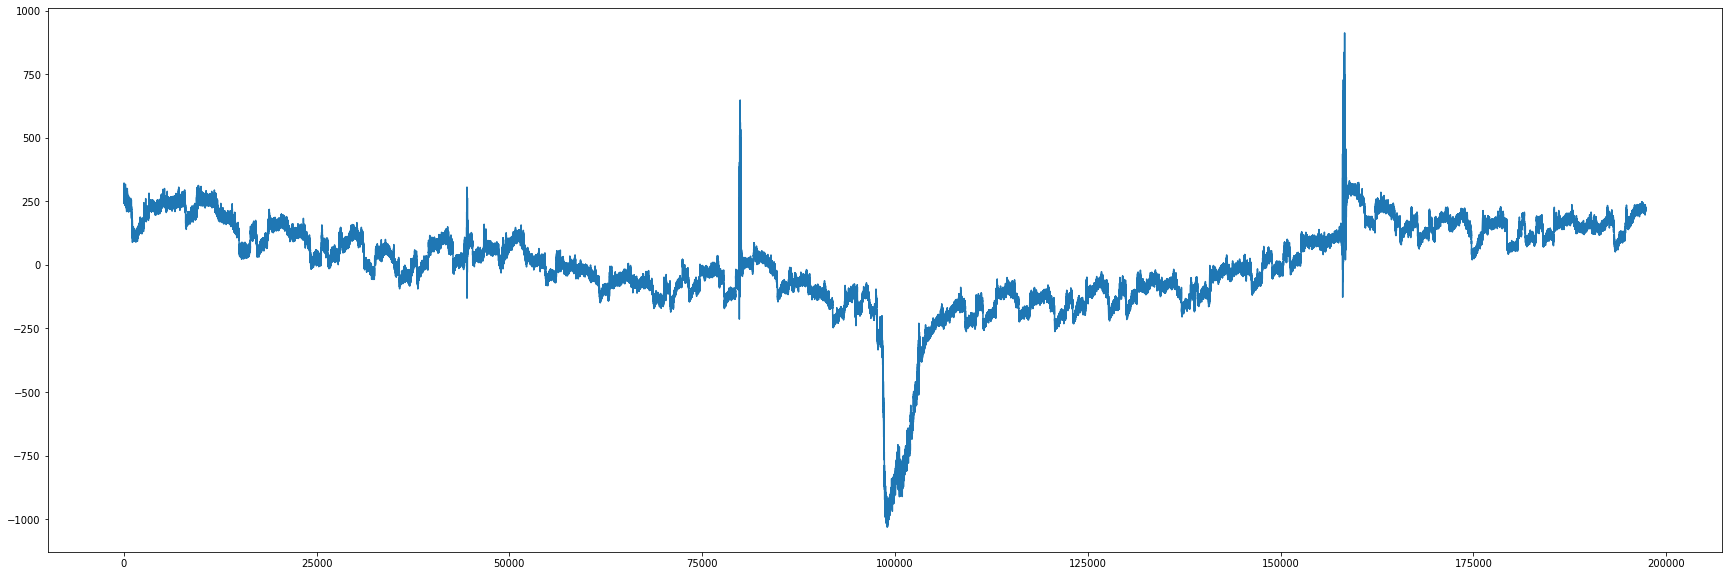

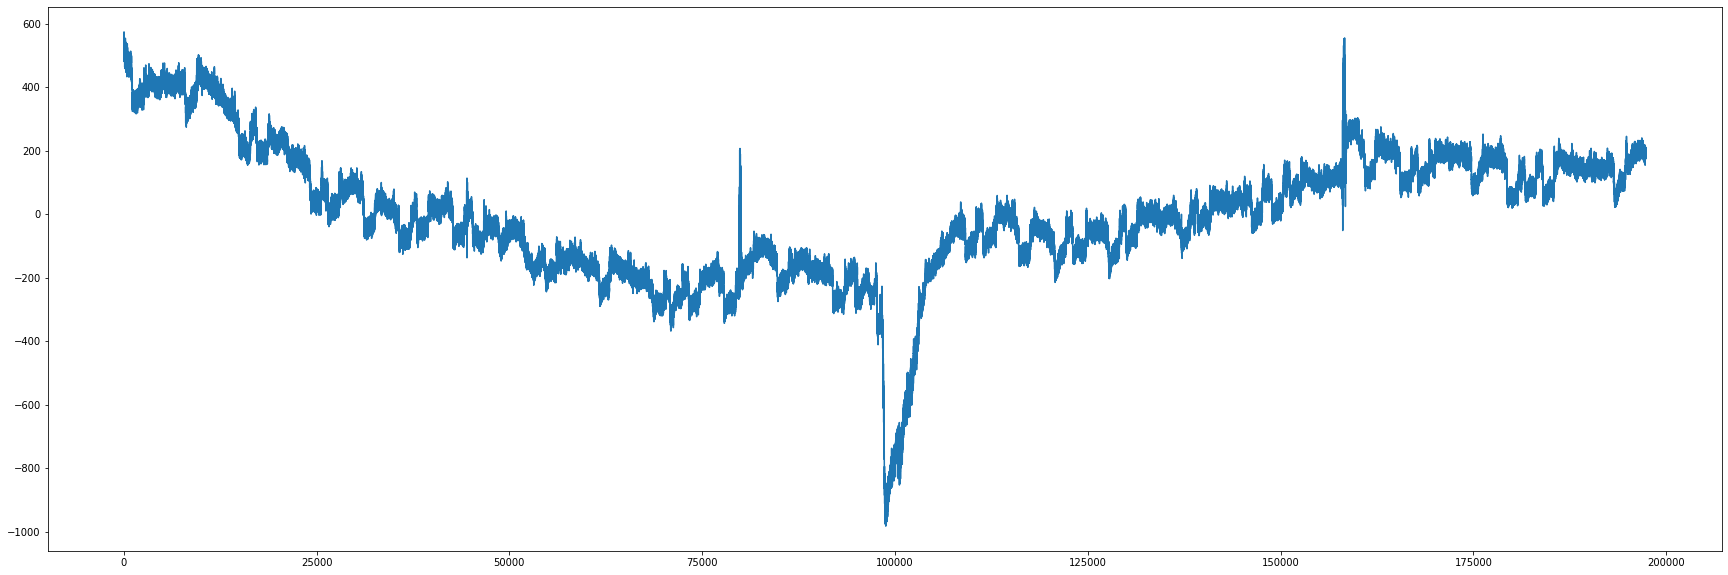

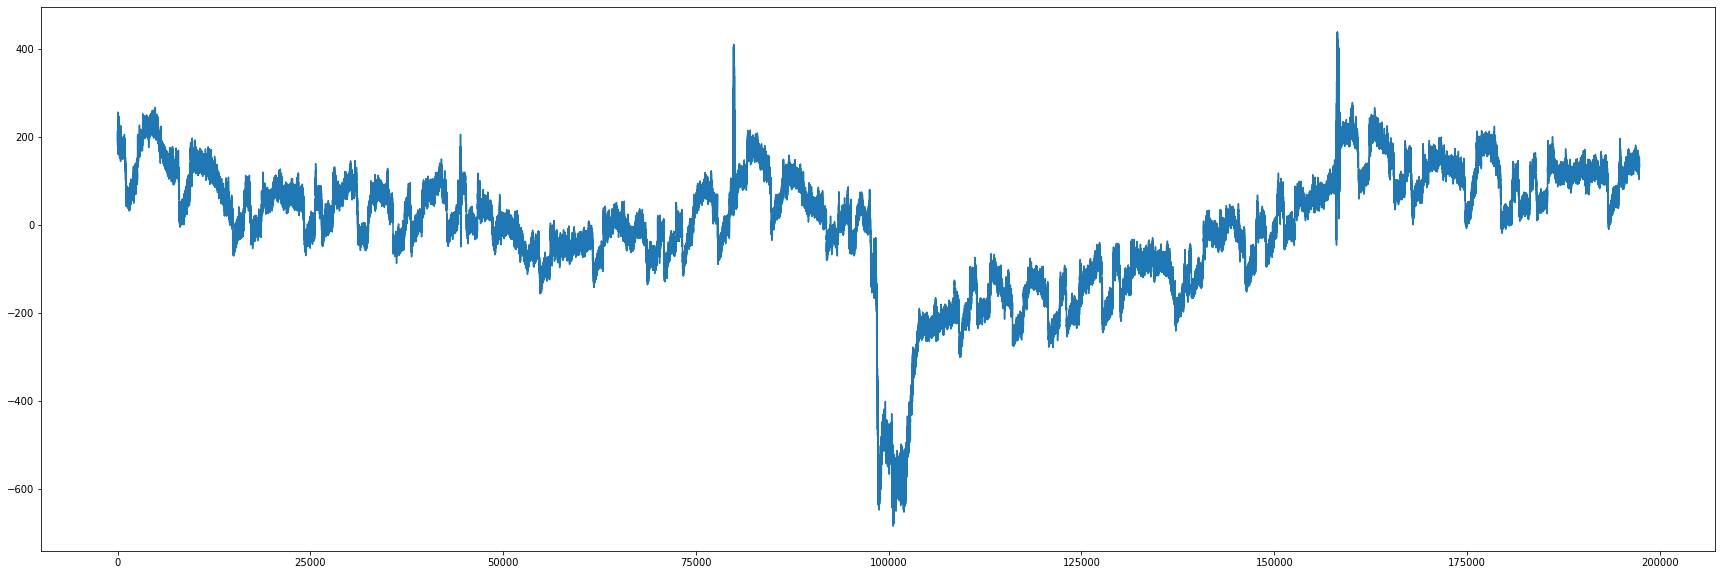

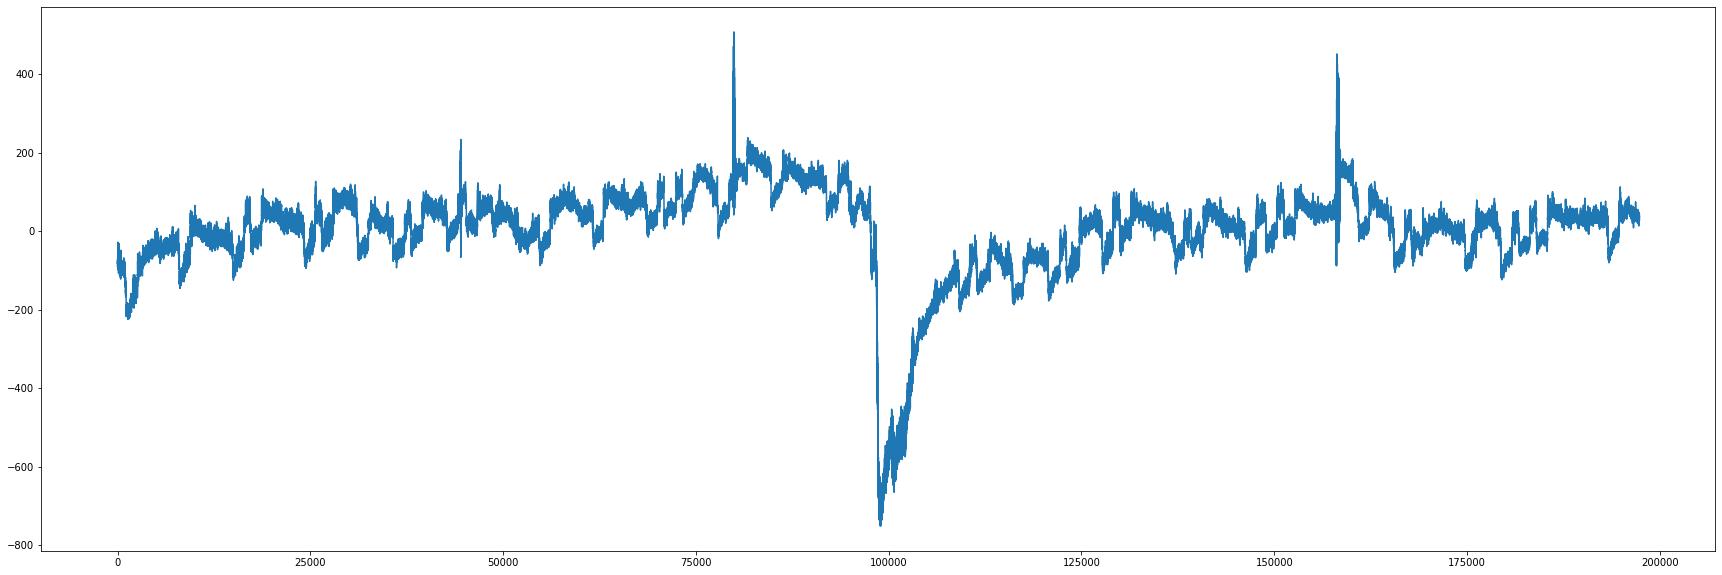

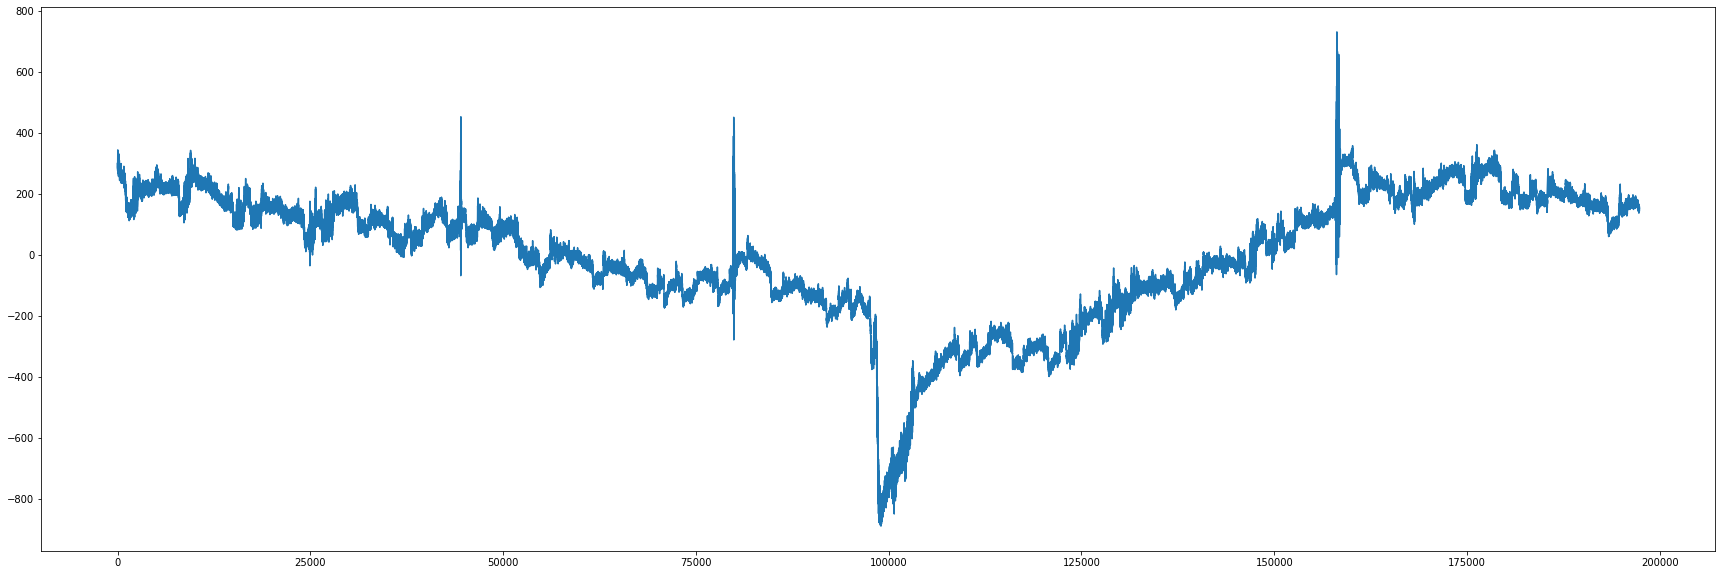

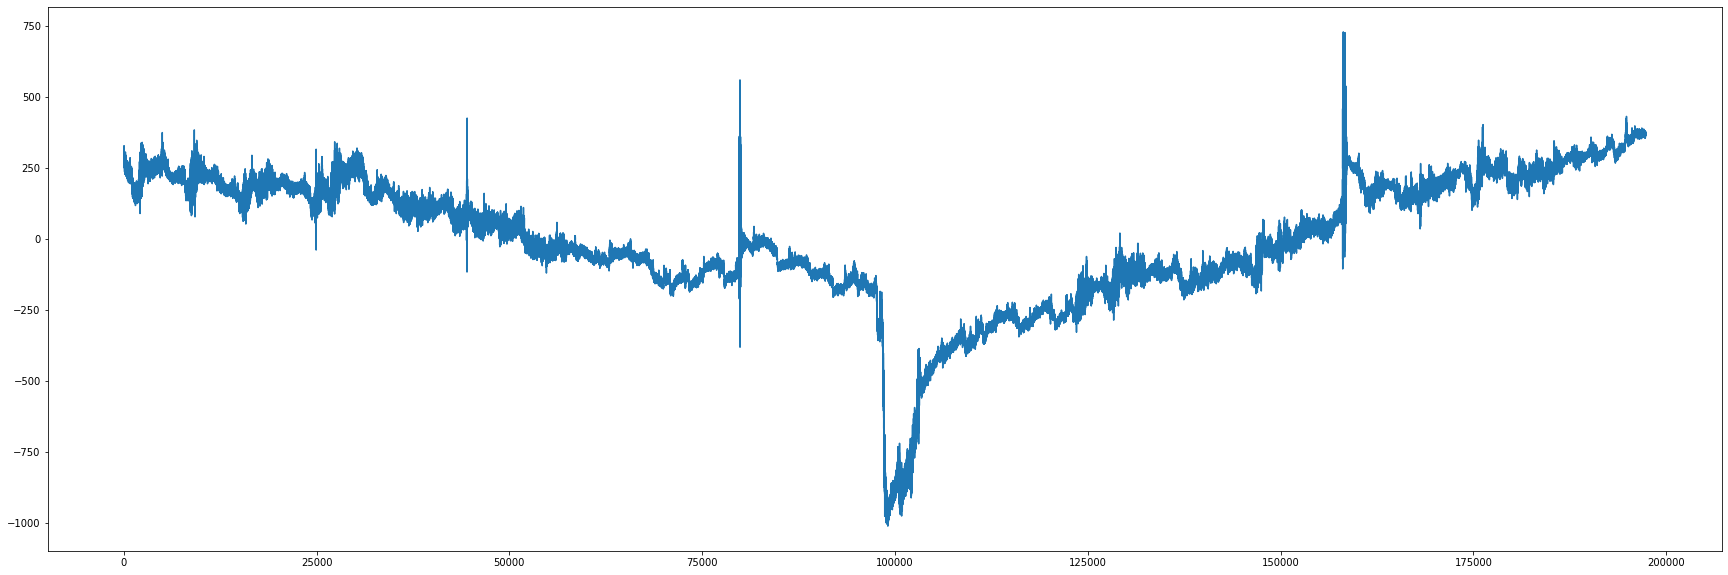

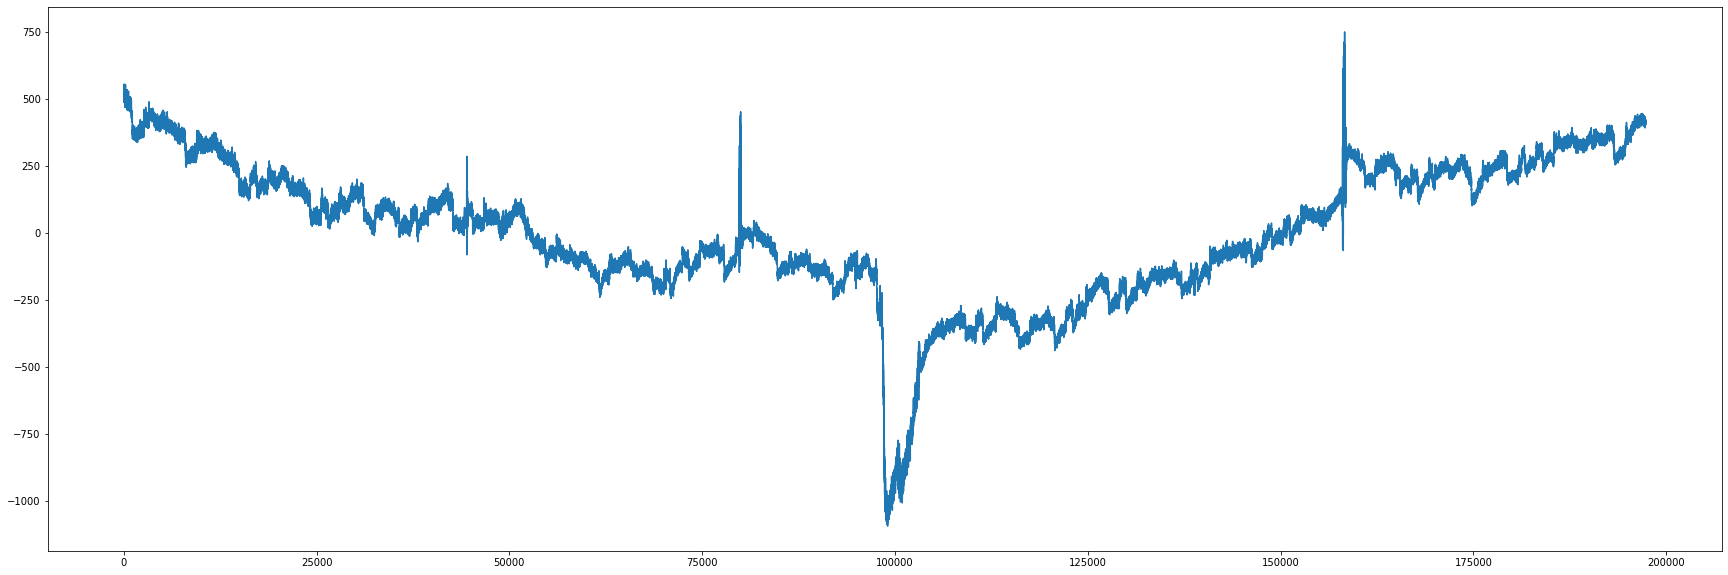

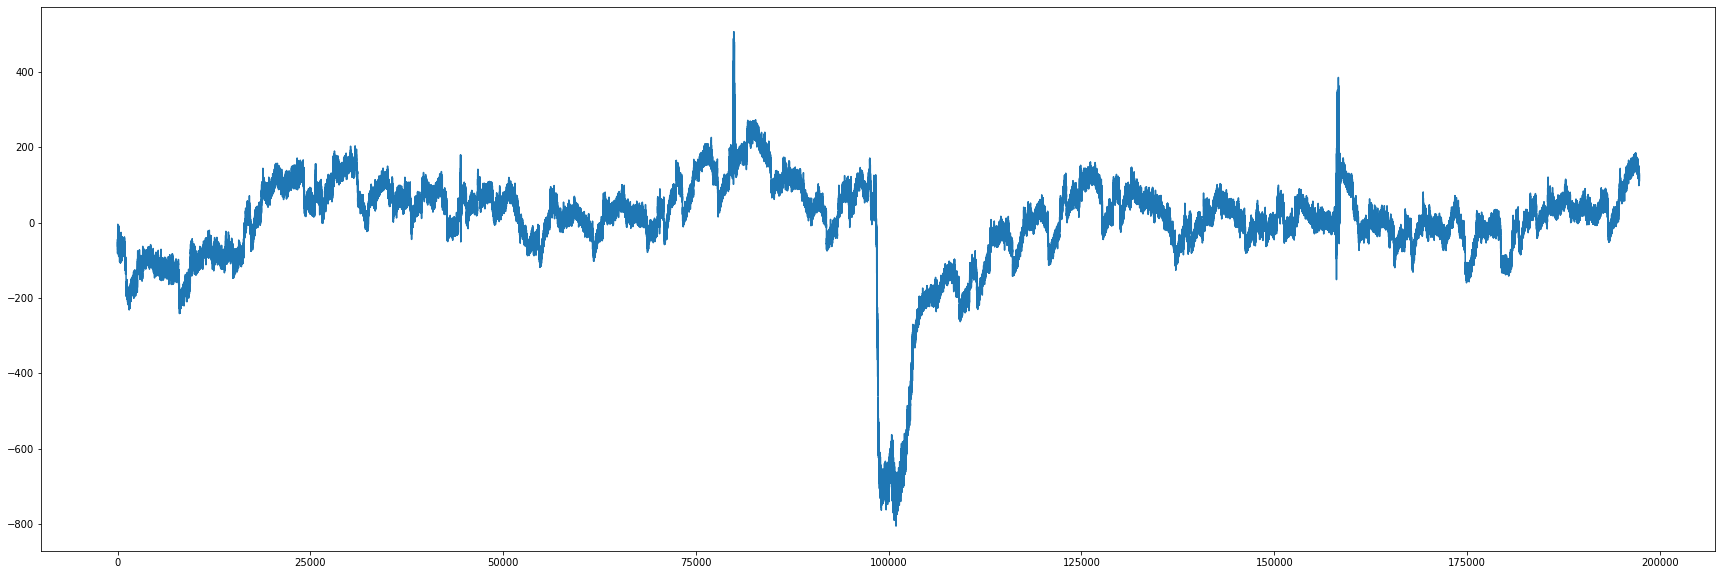

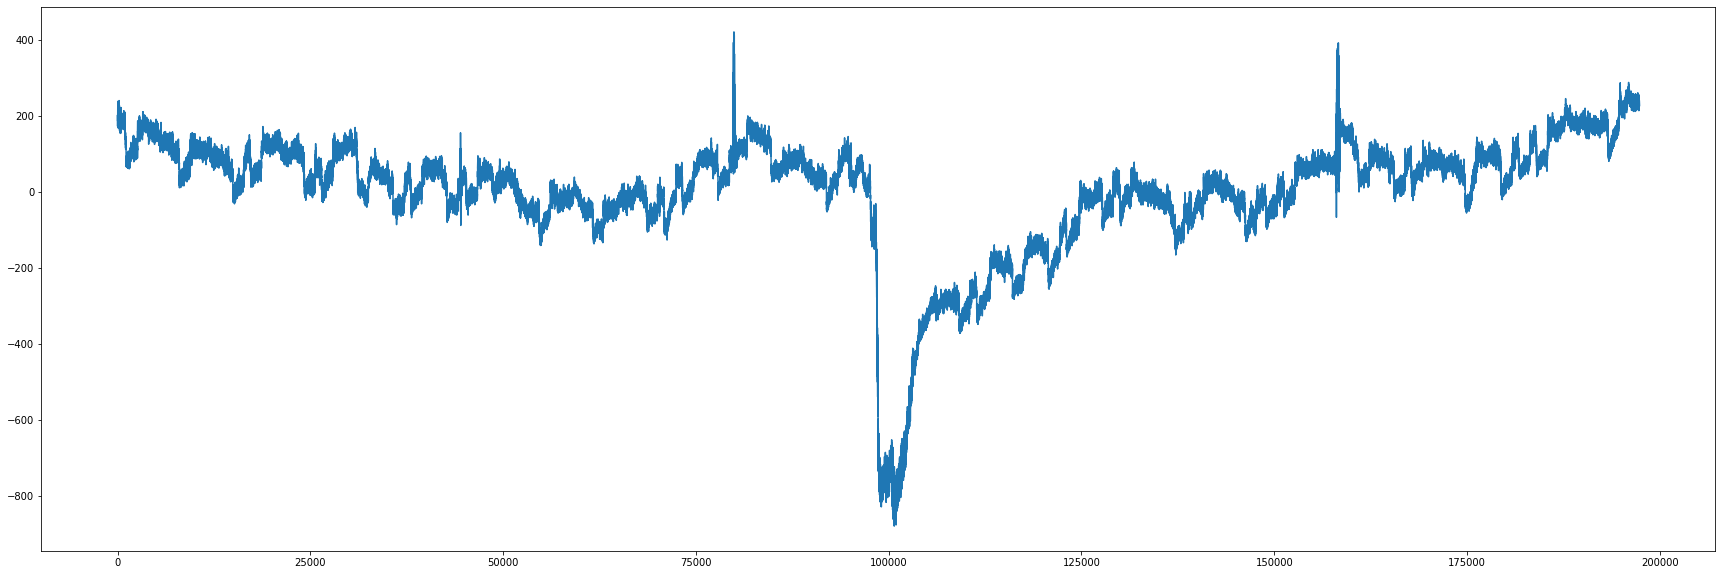

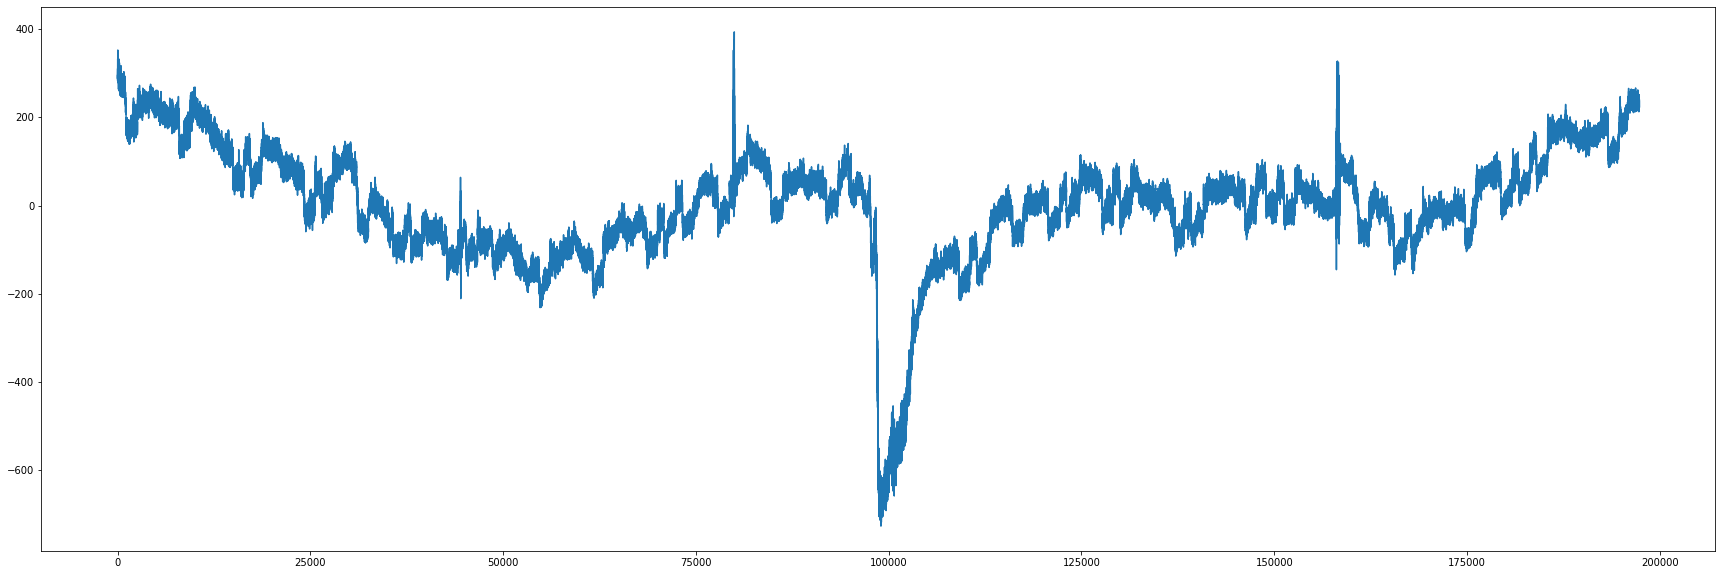

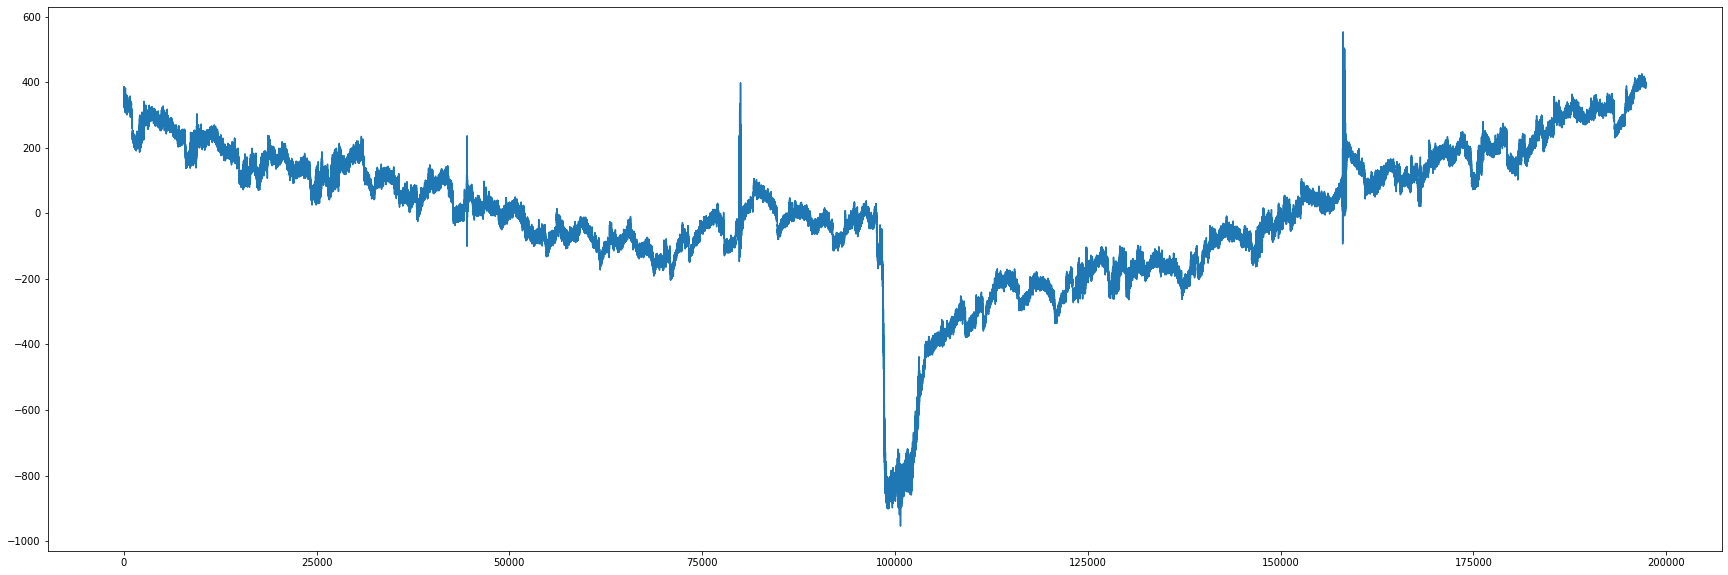

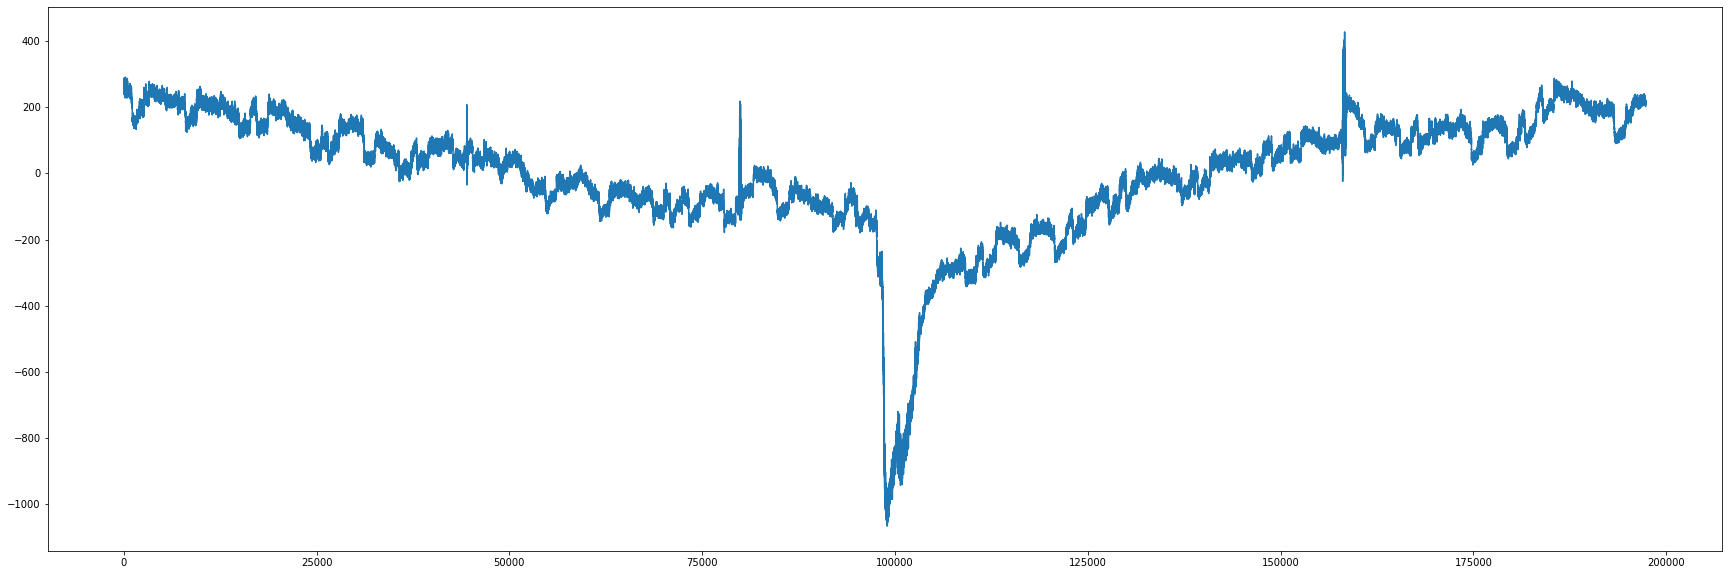

In [71]:
#P1_post_training

t = range(197343)       
for i in range(16):
    
    x=P1_post_training['y'][:,i]
    x=signal.detrend(x)
    
    plt.figure(figsize=(30,10))
    plt.plot(t,x)
    plt.show()

## Start with P1_pre_training
### Preprocessing (prepare samples and cut 0)

In [52]:
x=P1_pre_training['y'][:,:]
x=signal.detrend(x)
x=np.transpose(x)
np.shape(x)

(16, 271816)

In [66]:
times=range(0,np.shape(x)[1],8)
samples0=[]       #set of examples, each matrix represent a trial (59 channels X interval time)
labels0=[]
for i in times:
    samples0.append(x[:,i:i+8])  
    labels0.append(label_P1_pre_training[:,0][i])

In [67]:
np.shape(samples0), np.shape(labels0), set(labels0)

((33977, 16, 8), (33977,), {-1, 0, 1})

In [72]:
#cut the zeros
samples=[]       #set of examples, each matrix represent a trial (59 channels X interval time)
labels=[]

for i in range(len(labels0)):
    if labels0[i]!=0:
        labels.append(labels0[i])
        samples.append(samples0[i])

In [73]:
np.shape(samples), np.shape(labels), set(labels)  #samples is 20226 matrix (16 x 8)

((20226, 16, 8), (20226,), {-1, 1})

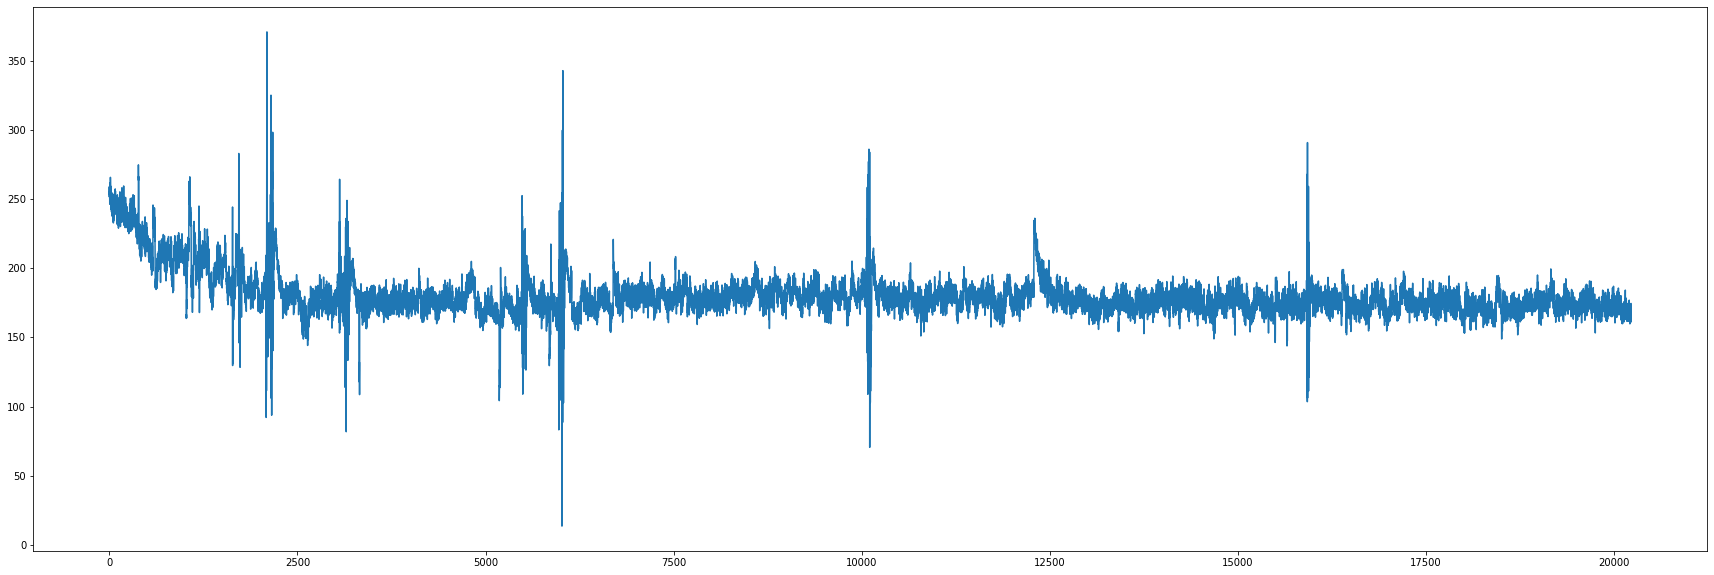

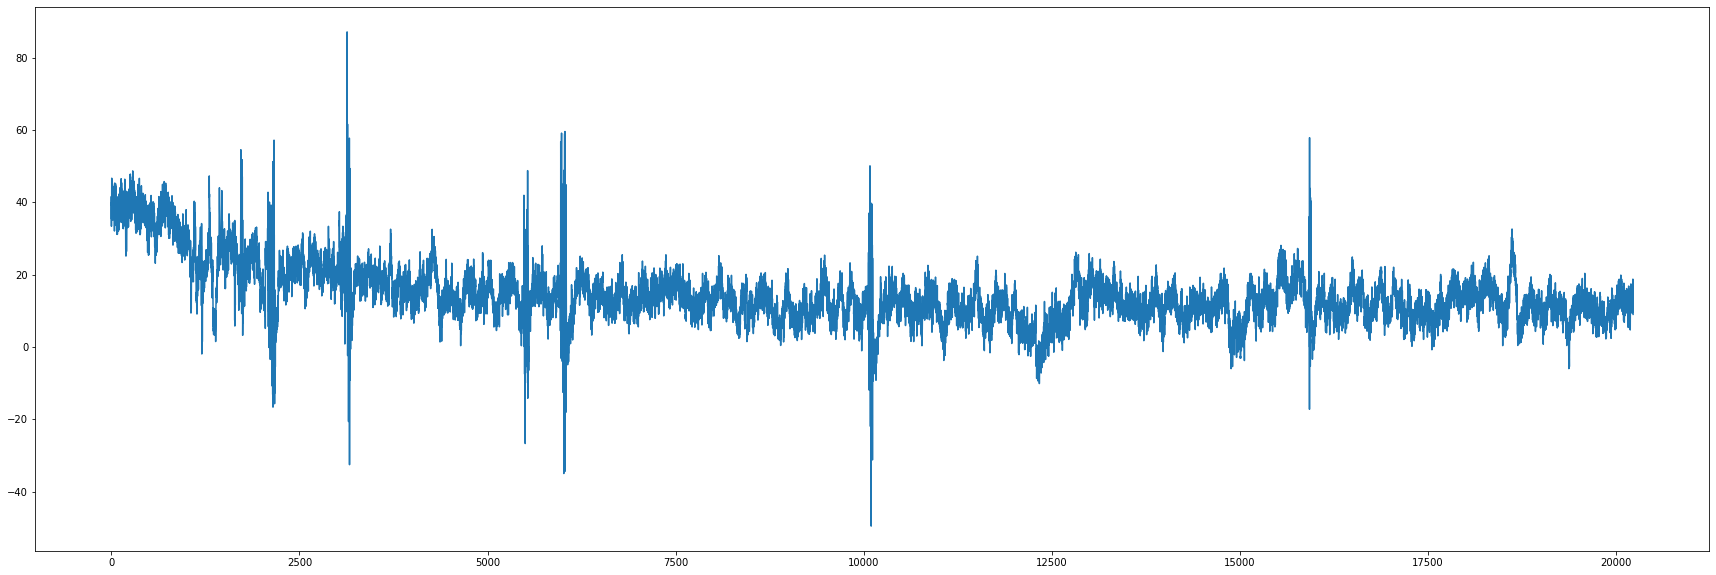

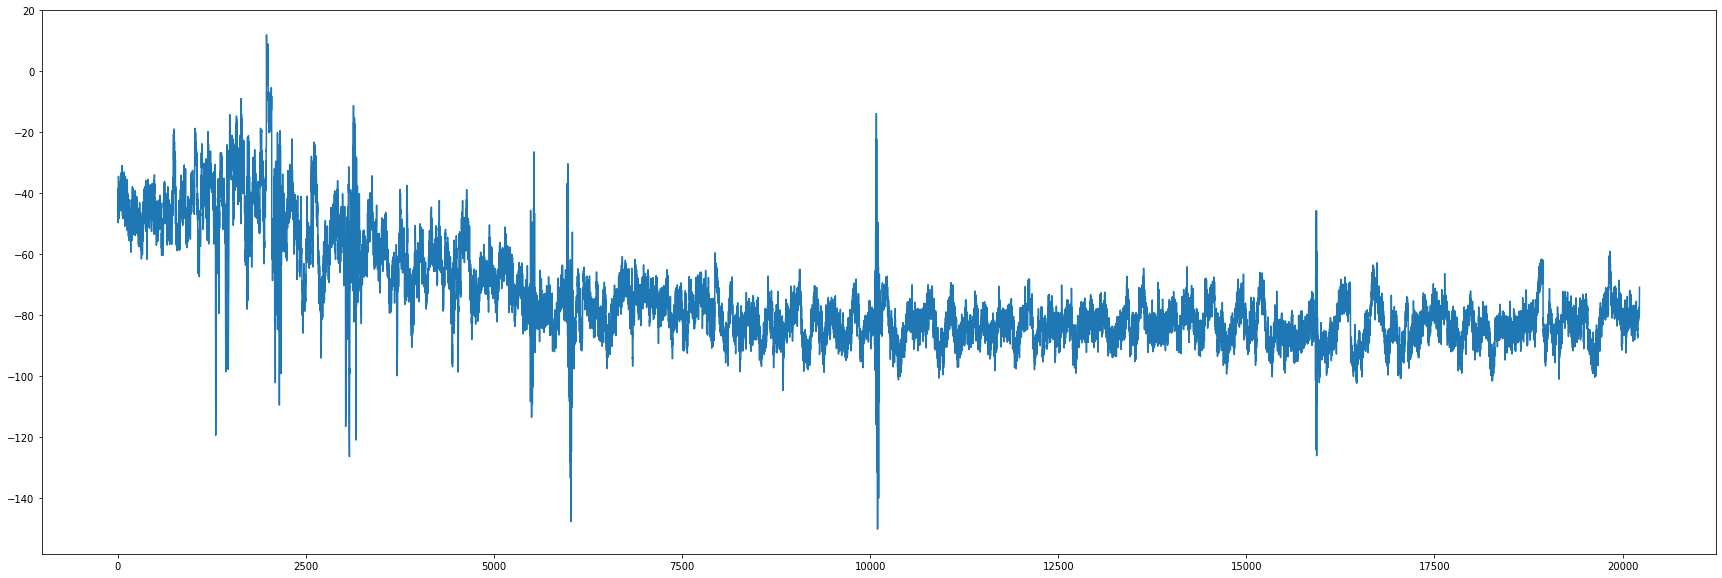

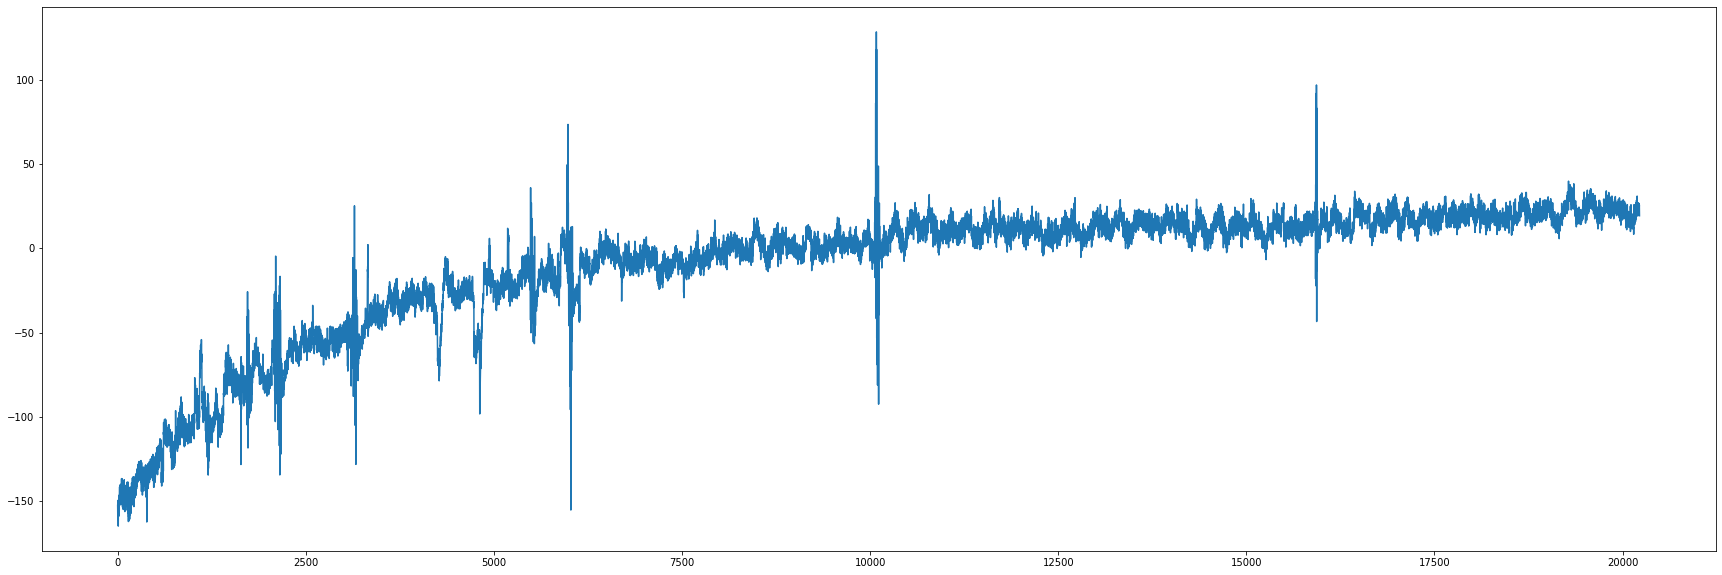

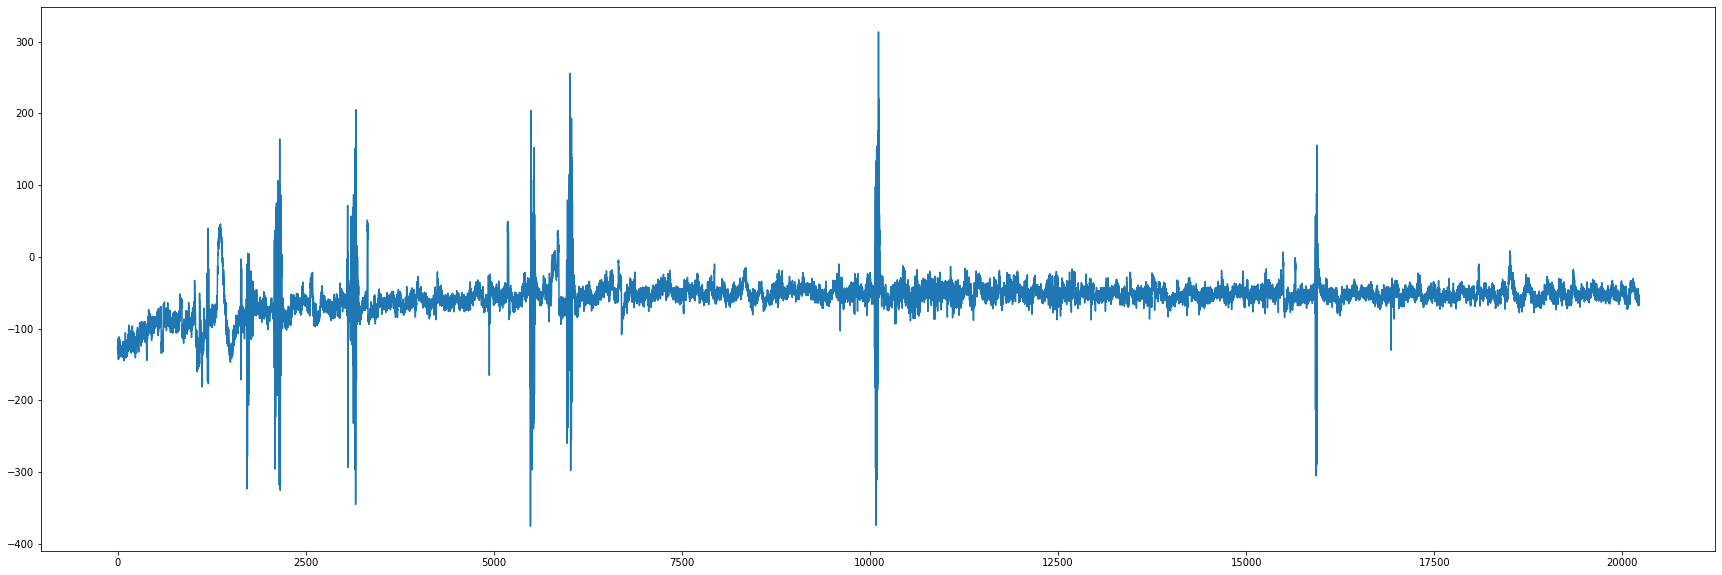

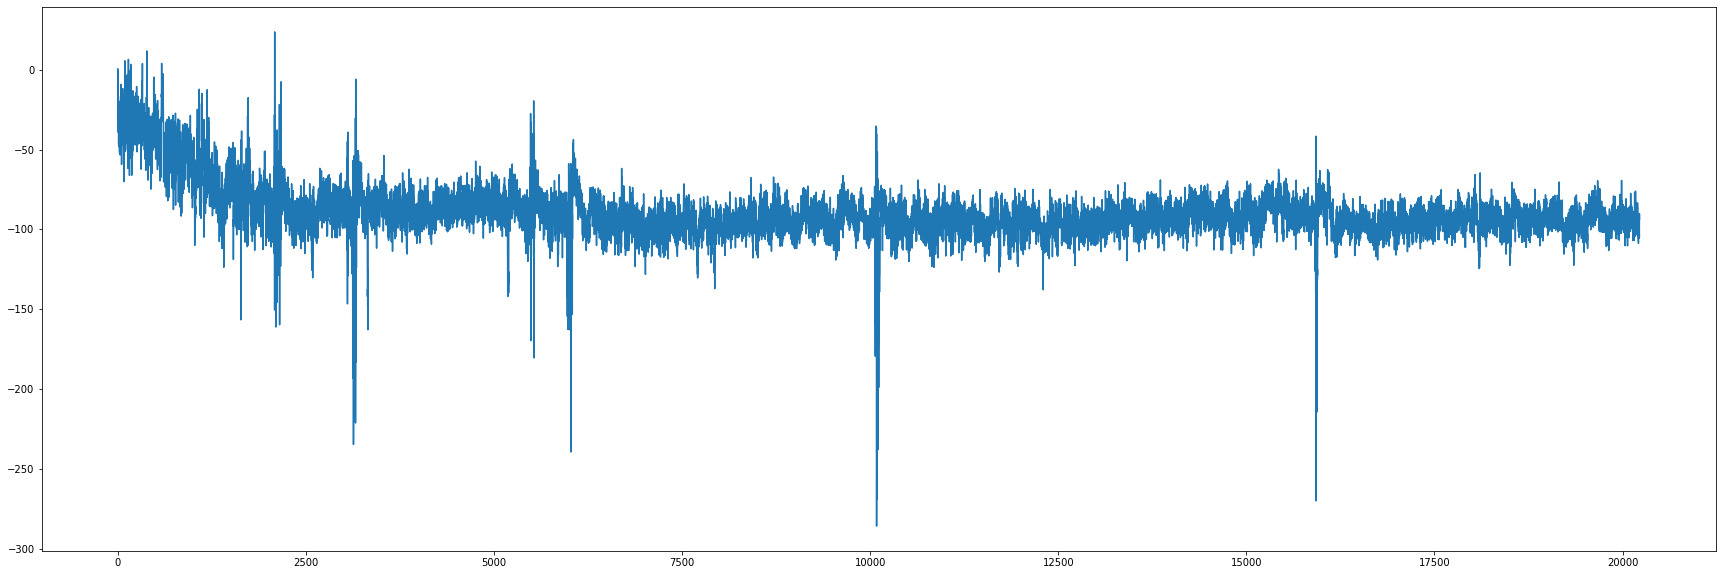

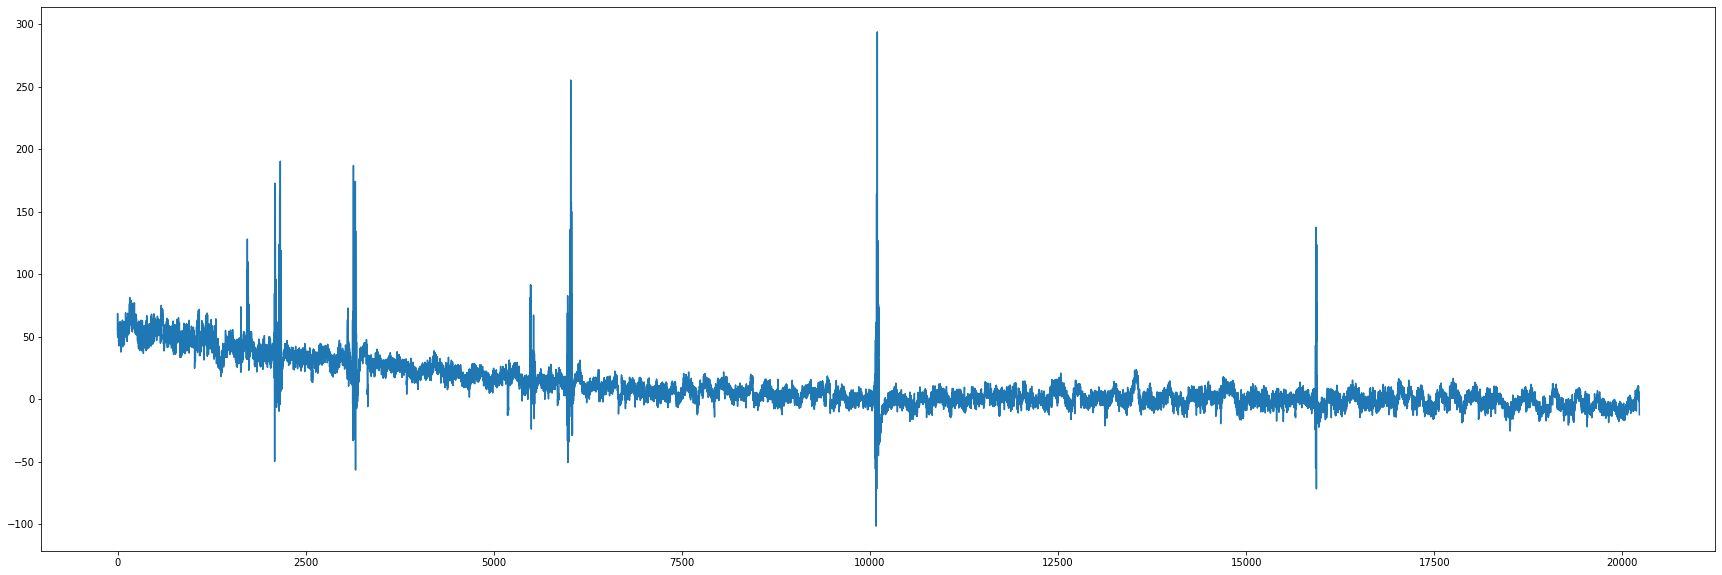

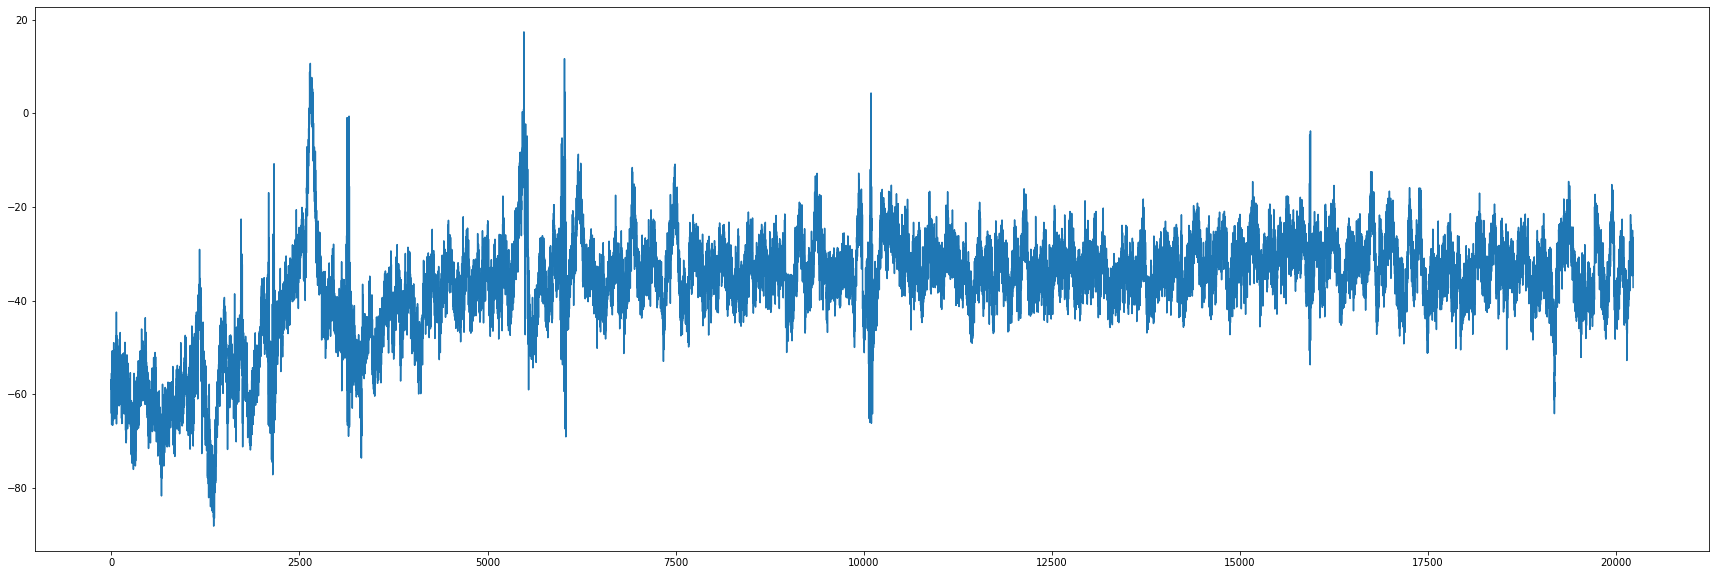

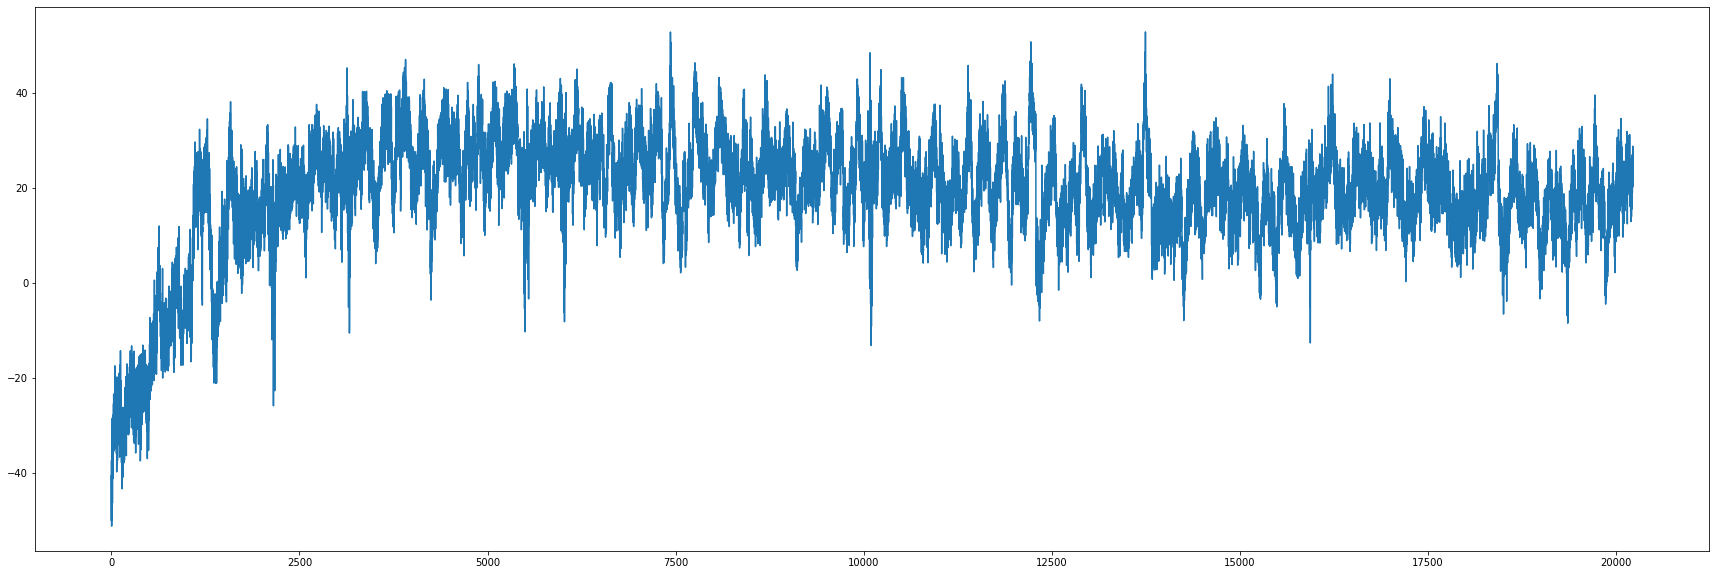

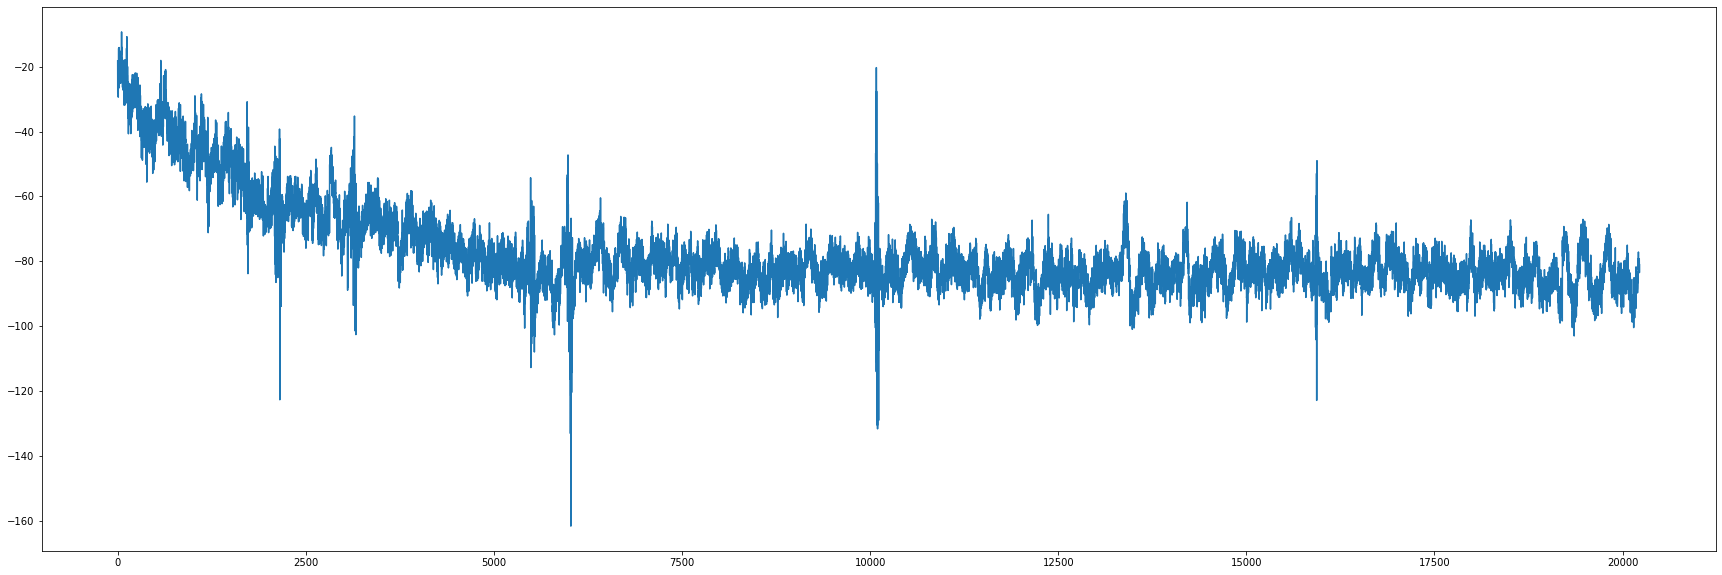

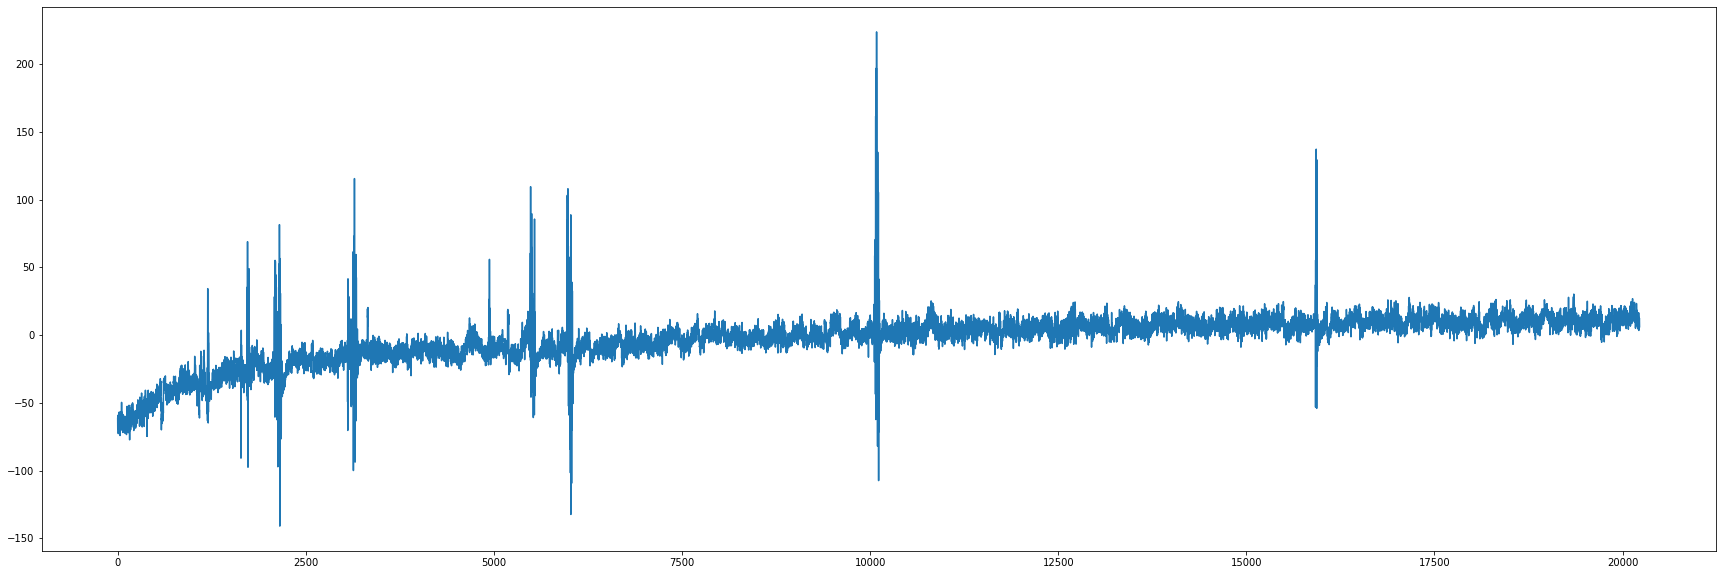

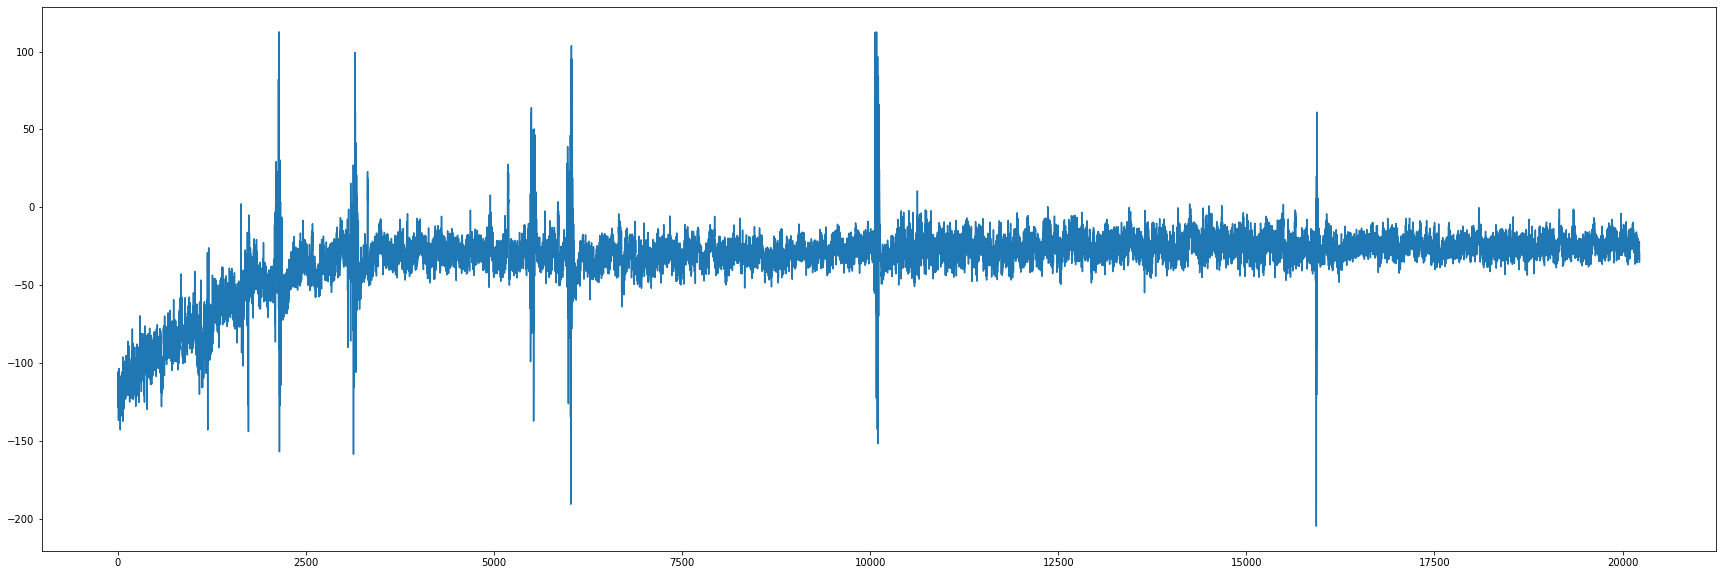

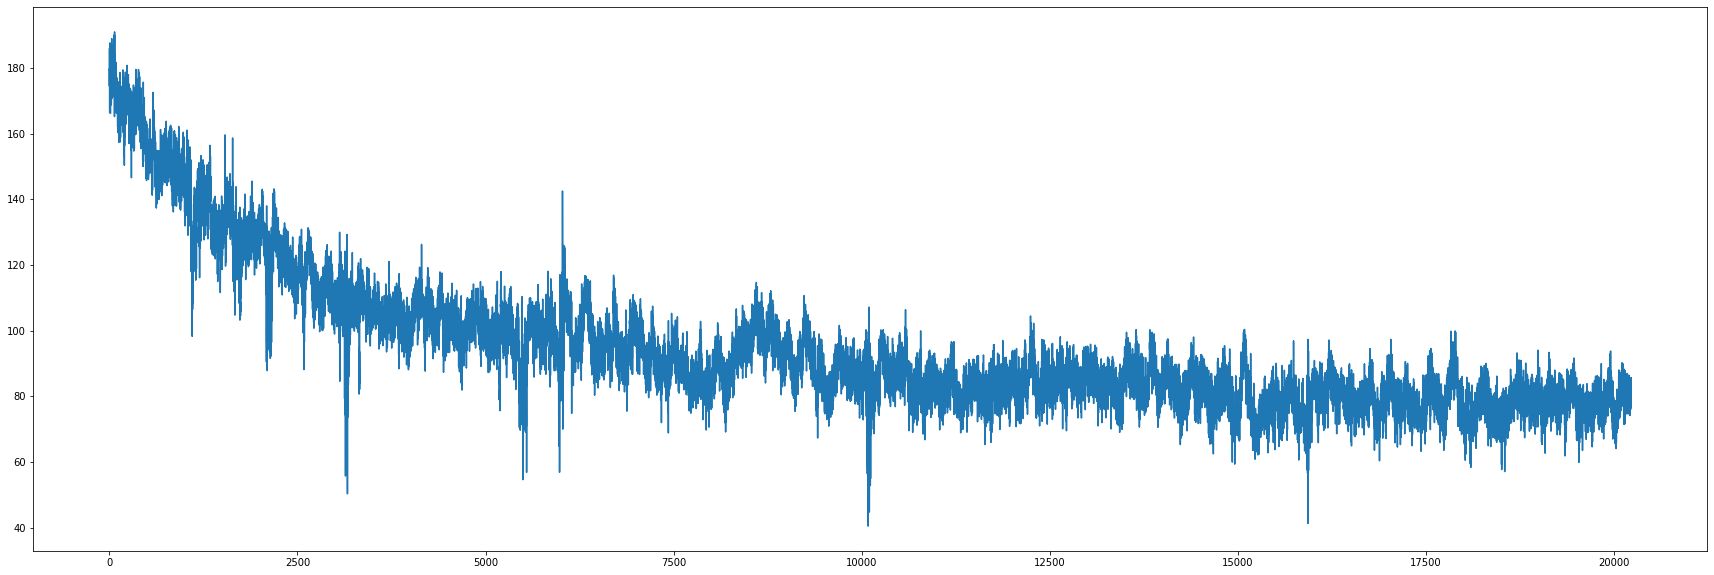

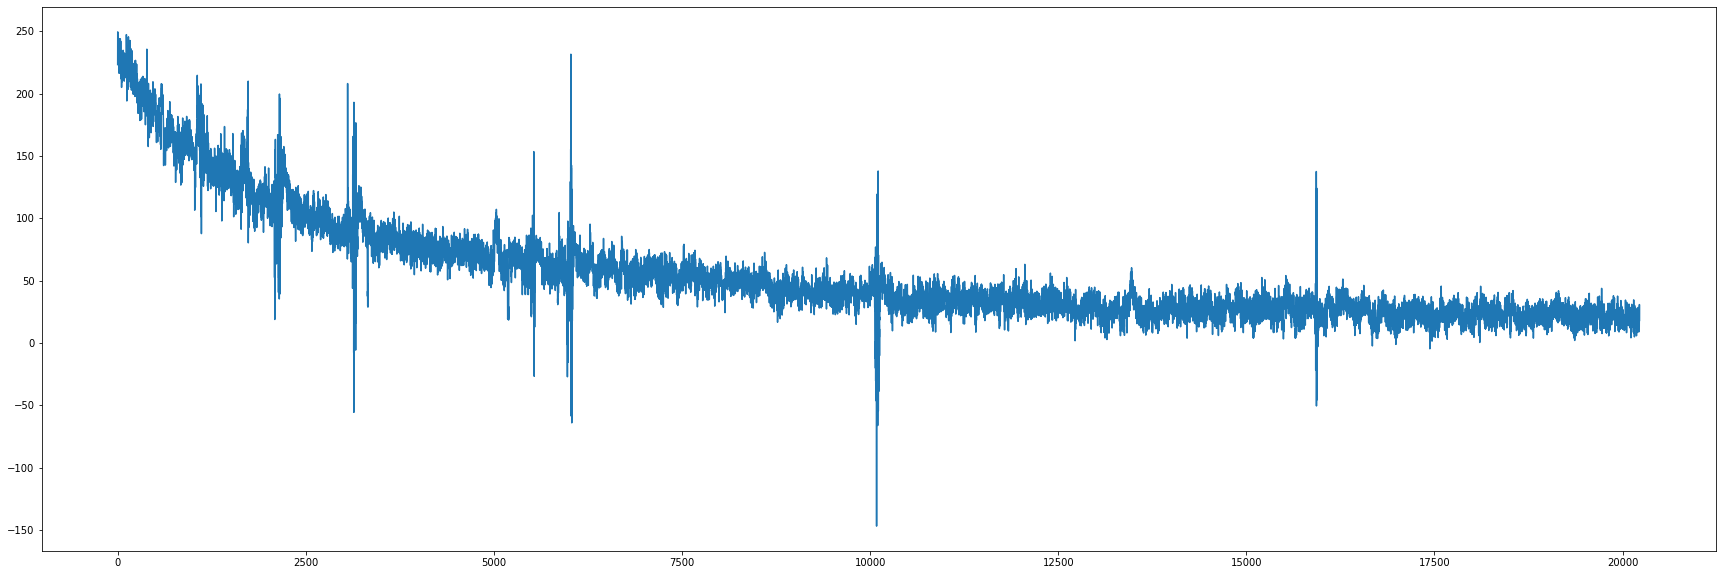

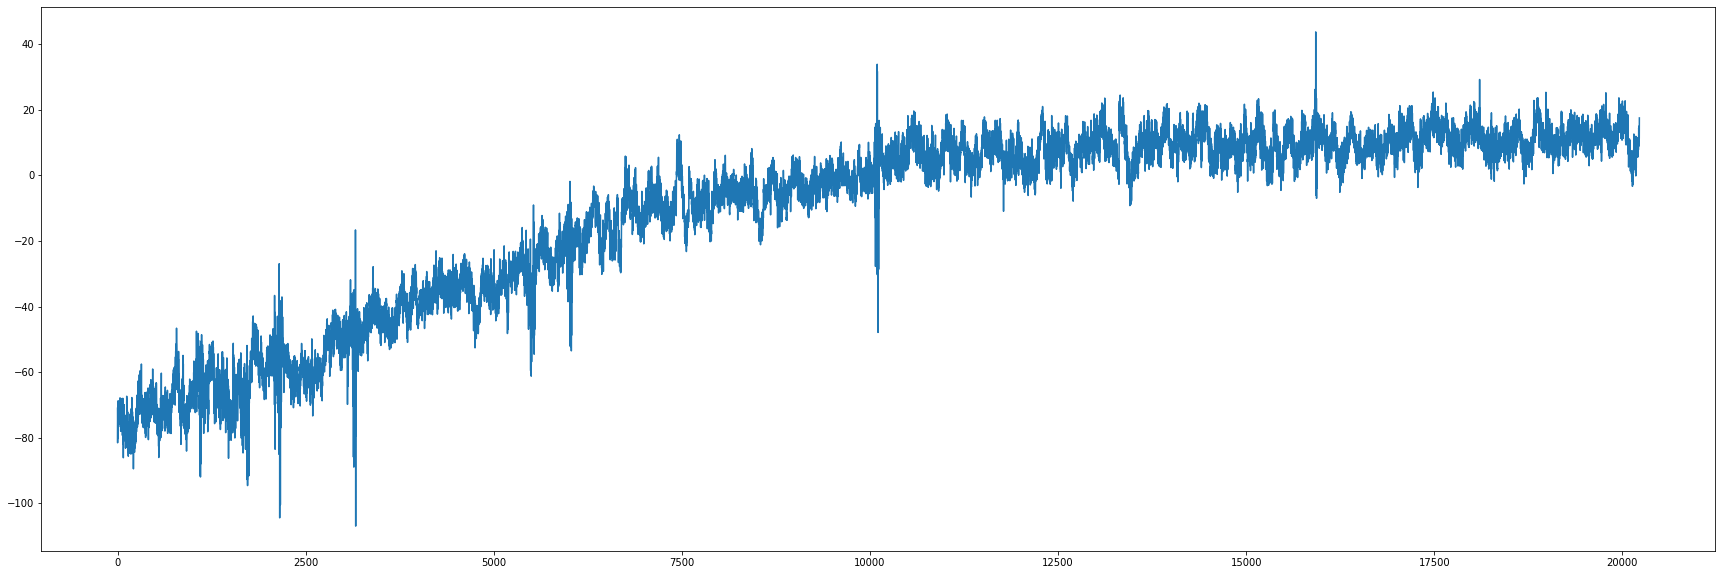

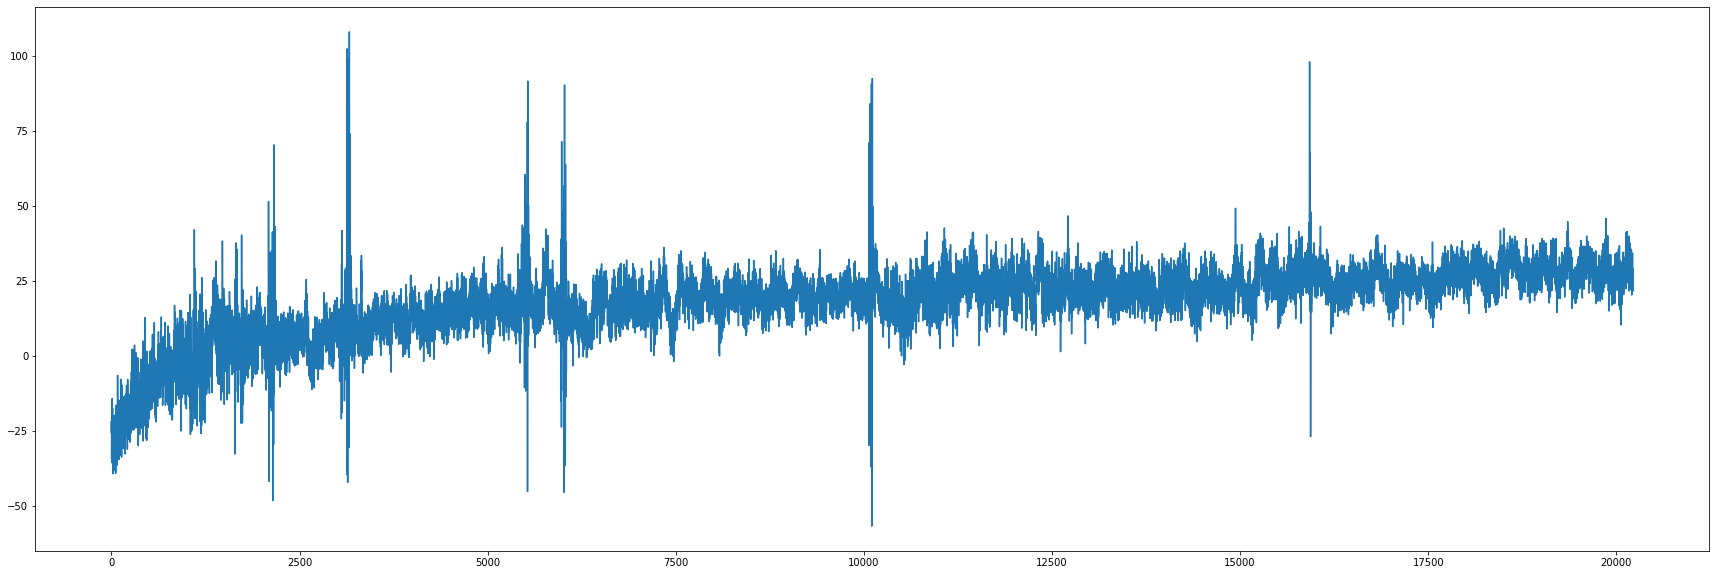

In [93]:
#P1_pre_training without zeros

t = range(20226)        
for i in range(16):
    
    x=(np.transpose(samples))[0][i]
    
    plt.figure(figsize=(30,10))
    plt.plot(t,x)
    plt.show()